In [1]:
import joblib
import tensorflow as tf
from sklearn.ensemble import StackingRegressor
from keras_functions import r2_keras,build_model

model_gradient = joblib.load('./final_model/gradient_bossting.pkl')
model_neural = tf.keras.models.load_model('./final_model/neural_network.keras')
with open('./final_model/stacking_model.pkl', 'rb') as f:
    loaded_model: StackingRegressor  = joblib.load(f)


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_all = pd.read_csv('./all_donnees.csv')
le = LabelEncoder()
df_all['nom'] = le.fit_transform(df_all['nom'])

y_test = df_all[['pourcentage_voix']].copy()

X_test= df_all[["part_pauvres_diff","part_modestes_diff","part_medians_diff","part_plutot_aises_diff",
                 "part_aises_diff","actemp","actcho","inactret","age_moyen","total_voix_par_ville","nom"
                 ,"insecurite","taux_chomage_moyen"]].copy()

In [3]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mapping)

{'ARTHAUD': 0, 'DUPONT-AIGNAN': 1, 'HIDALGO': 2, 'JADOT': 3, 'LASSALLE': 4, 'LE PEN': 5, 'MACRON': 6, 'MÉLENCHON': 7, 'POUTOU': 8, 'PÉCRESSE': 9, 'ROUSSEL': 10, 'ZEMMOUR': 11, 'abstentions': 12, 'blancs': 13, 'nuls': 14}


In [4]:
y_pred = loaded_model.predict(X_test)

In [5]:
encoded_labels = df_all['nom'].values

df_all['nom'] = le.inverse_transform(encoded_labels)

In [6]:
print(df_all['nom'])

0              ARTHAUD
1              ROUSSEL
2               MACRON
3             LASSALLE
4               LE PEN
             ...      
56950           POUTOU
56951    DUPONT-AIGNAN
56952      abstentions
56953           blancs
56954             nuls
Name: nom, Length: 56955, dtype: object


In [7]:
print(y_pred)

[ 0.63701613  2.35305049 16.79962978 ... 19.22415326  1.25933797
  0.9178577 ]


In [8]:
print(y_test)

       pourcentage_voix
0              1.030928
1              1.288660
2              9.793814
3              2.061856
4             37.371134
...                 ...
56950          0.000000
56951          2.985075
56952         16.915423
56953          1.492537
56954          0.000000

[56955 rows x 1 columns]


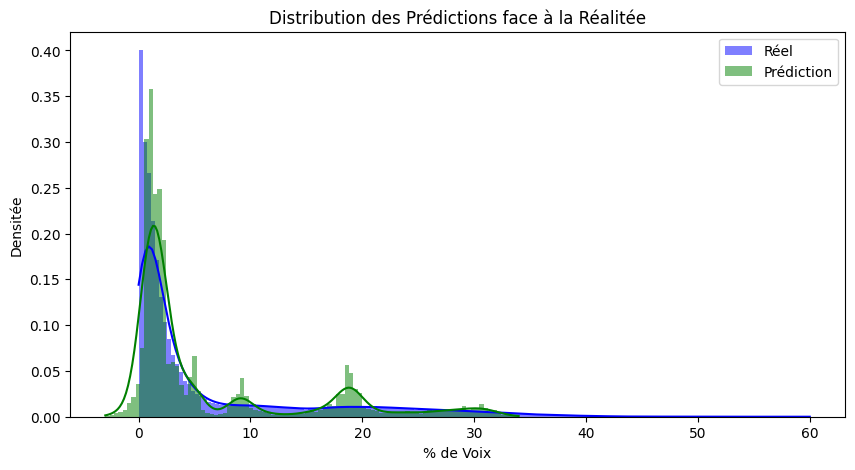

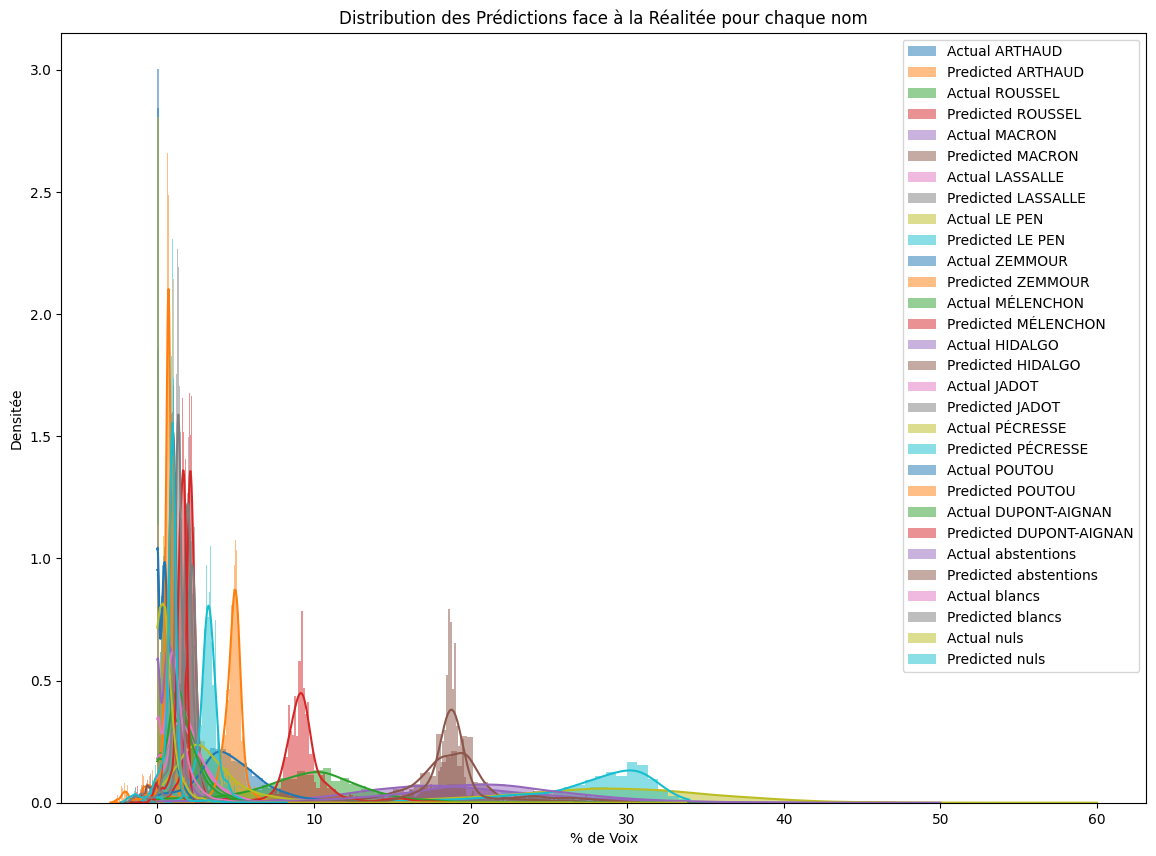

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_results_nom = pd.DataFrame({'Actual': y_test.values.ravel() , 'Predicted': y_pred.flatten(), 'nom': df_all['nom']})

plt.figure(figsize=(10, 5))
sns.histplot(df_results_nom['Actual'], color='blue', kde=True, label='Réel', stat="density", linewidth=0)
sns.histplot(df_results_nom['Predicted'], color='green', kde=True, label='Prédiction', stat="density", linewidth=0)
plt.xlabel('% de Voix')
plt.ylabel('Densitée')
plt.title('Distribution des Prédictions face à la Réalitée')
plt.legend()
plt.show()

plt.figure(figsize=(14, 10))
for nom_value in df_results_nom['nom'].unique():
    subset = df_results_nom[df_results_nom['nom'] == nom_value]
    sns.histplot(subset['Actual'], kde=True, label=f'Actual {nom_value}', stat="density", linewidth=0)
    sns.histplot(subset['Predicted'], kde=True, label=f'Predicted {nom_value}', stat="density", linewidth=0)

plt.xlabel('% de Voix')
plt.ylabel('Densitée')
plt.title('Distribution des Prédictions face à la Réalitée pour chaque nom')
plt.legend()
plt.show()


In [10]:
df_all.columns

Index(['id', 'libdep', 'circo', 'part_pauvres_diff', 'part_modestes_diff',
       'part_medians_diff', 'part_plutot_aises_diff', 'part_aises_diff',
       'actemp', 'actcho', 'inactret', 'age_moyen', 'libelle_commune',
       'total_voix_par_ville', 'catégorie', 'nom', 'voix', 'pourcentage_voix',
       'code_insee', 'insecurite', 'taux_chomage_moyen'],
      dtype='object')

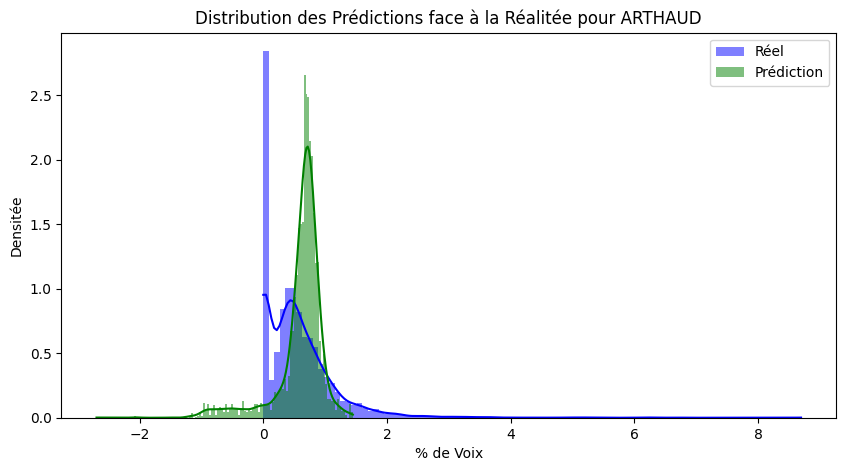

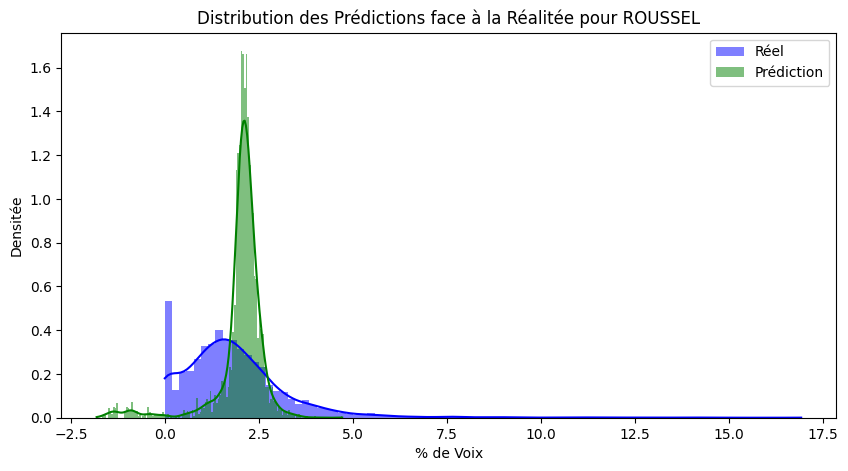

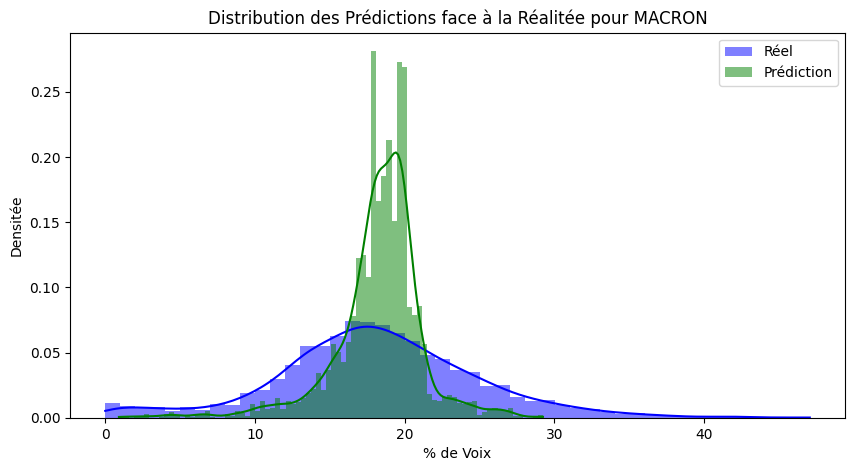

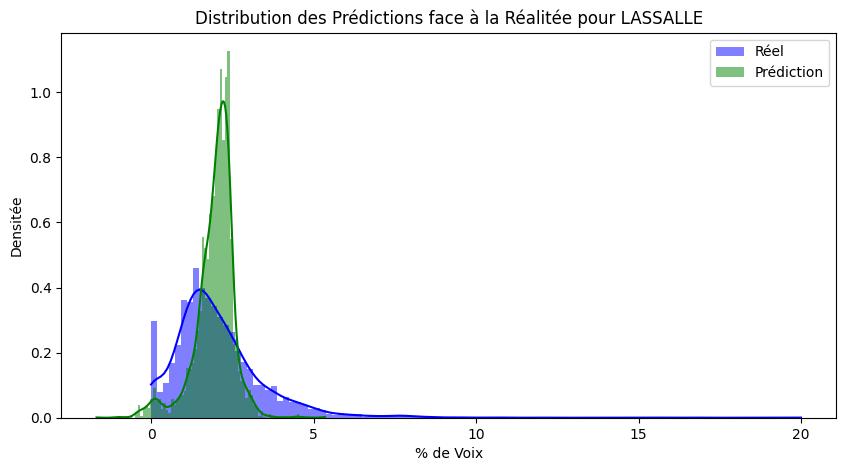

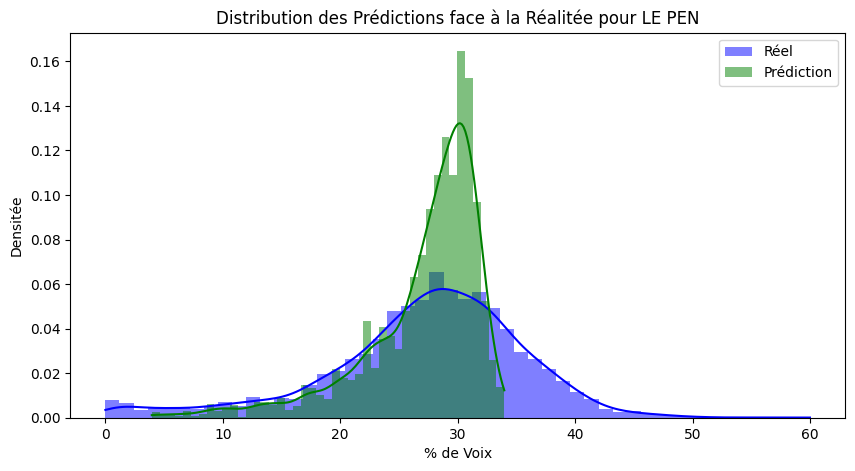

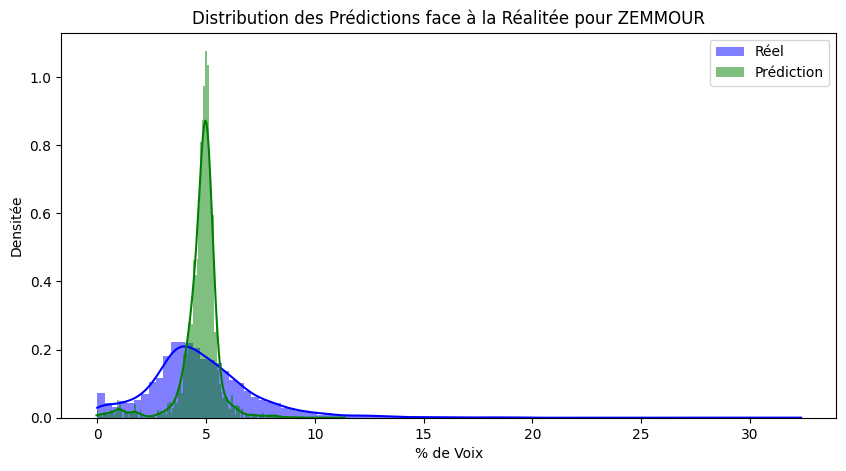

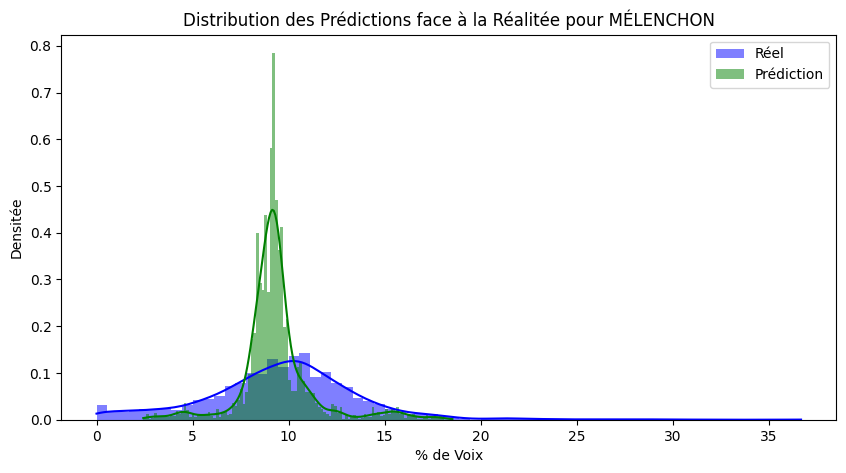

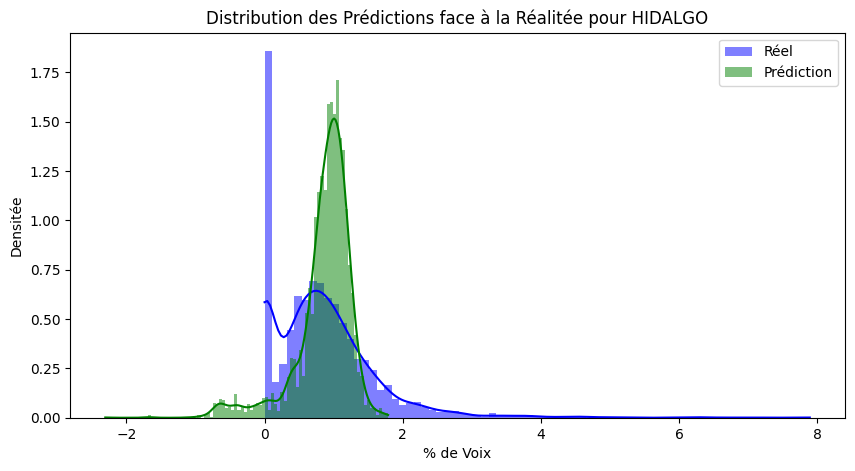

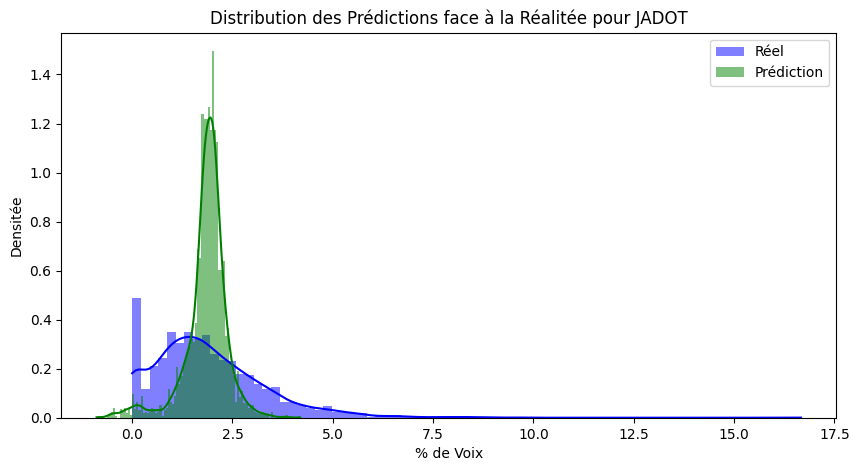

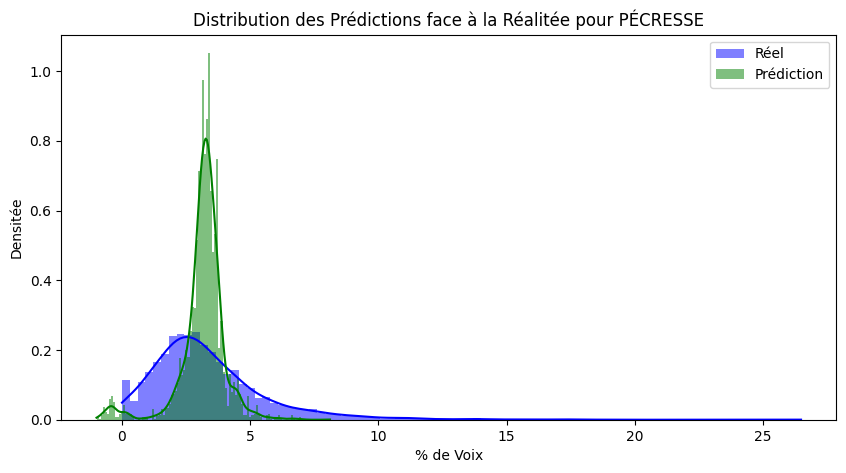

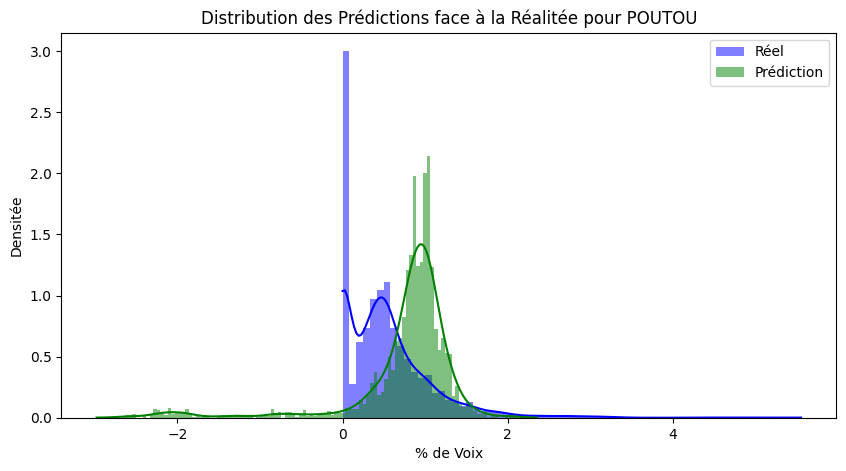

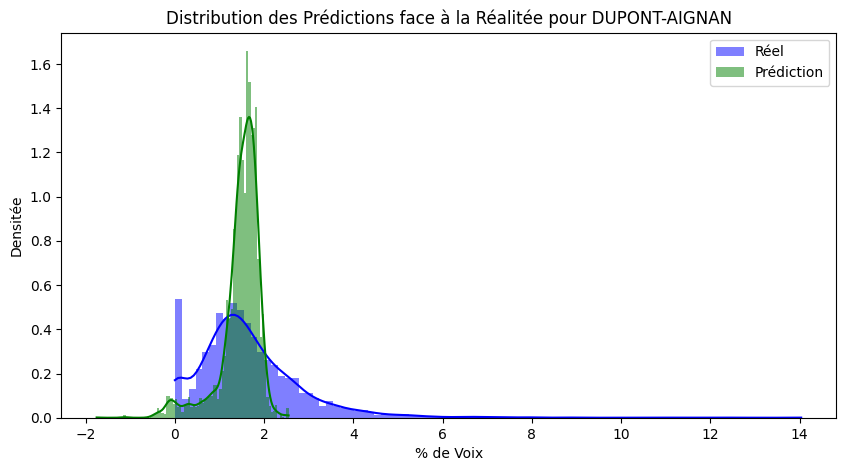

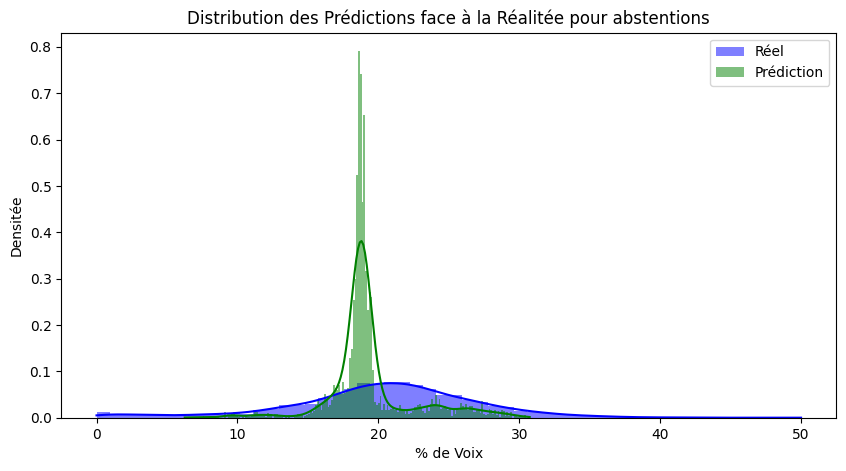

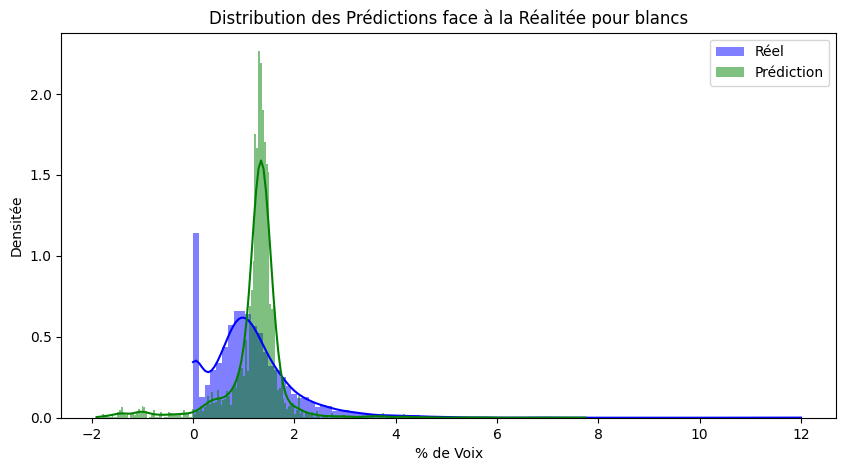

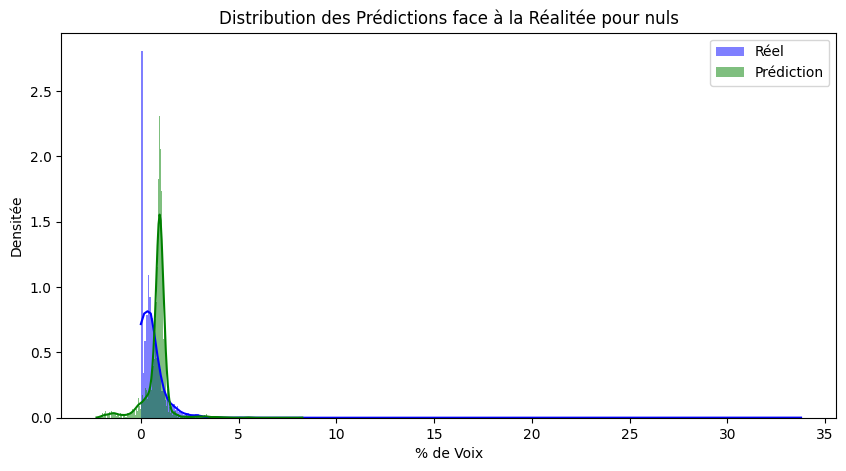

In [11]:
unique_noms = df_results_nom['nom'].unique()
for nom_value in unique_noms:
    subset = df_results_nom[df_results_nom['nom'] == nom_value]
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['Actual'], color='blue', kde=True, label='Réel', stat="density", linewidth=0)
    sns.histplot(subset['Predicted'], color='green', kde=True, label='Prédiction', stat="density", linewidth=0)
    plt.xlabel('% de Voix')
    plt.ylabel('Densitée')
    plt.title(f'Distribution des Prédictions face à la Réalitée pour {nom_value}')
    plt.legend()
    plt.show()
    

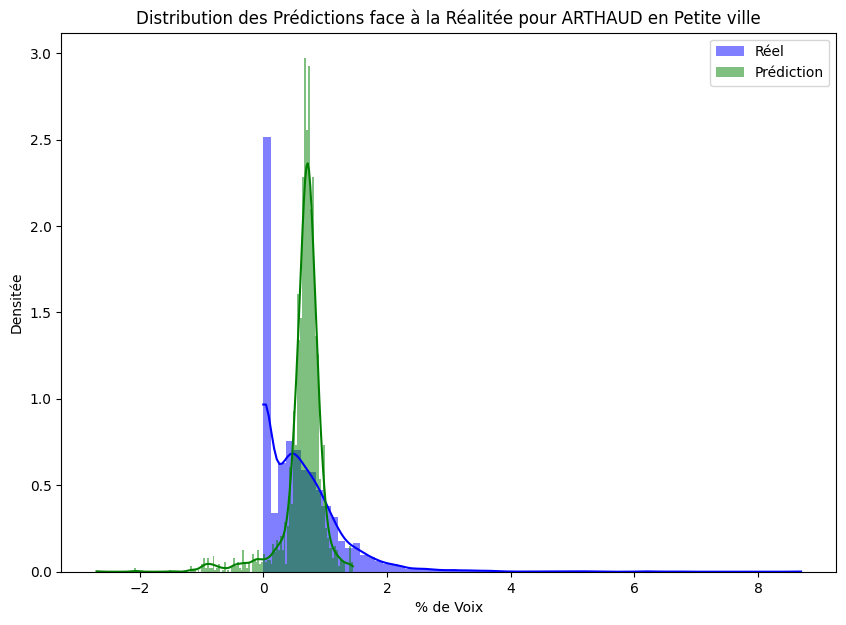

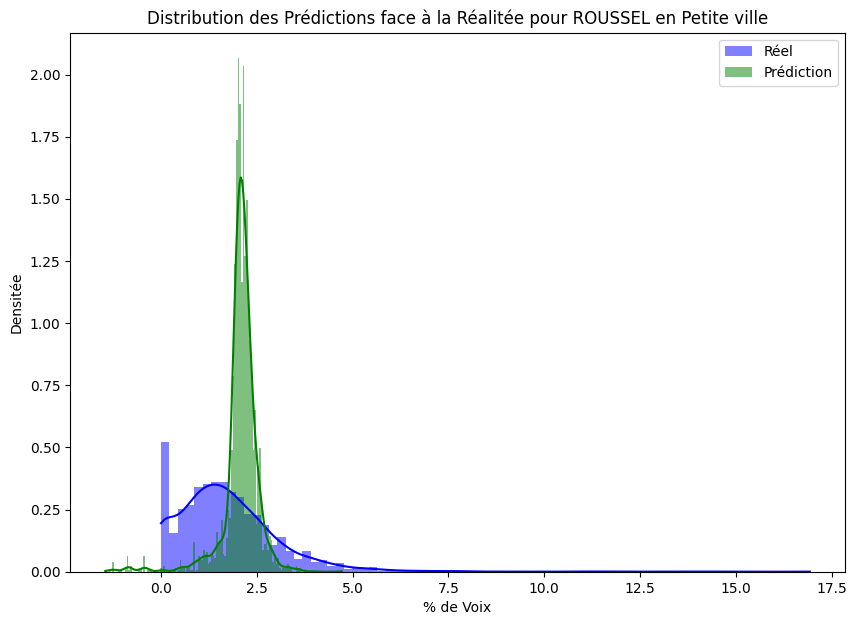

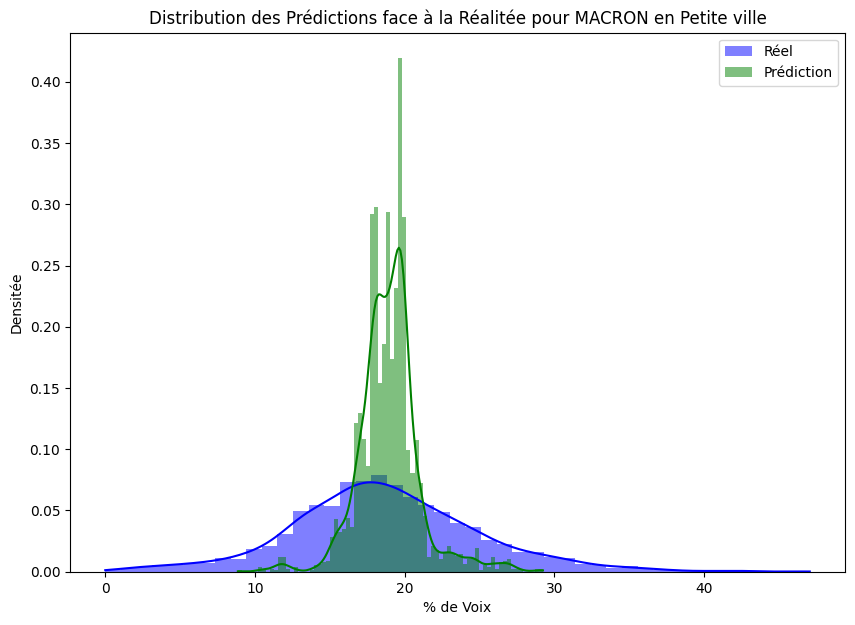

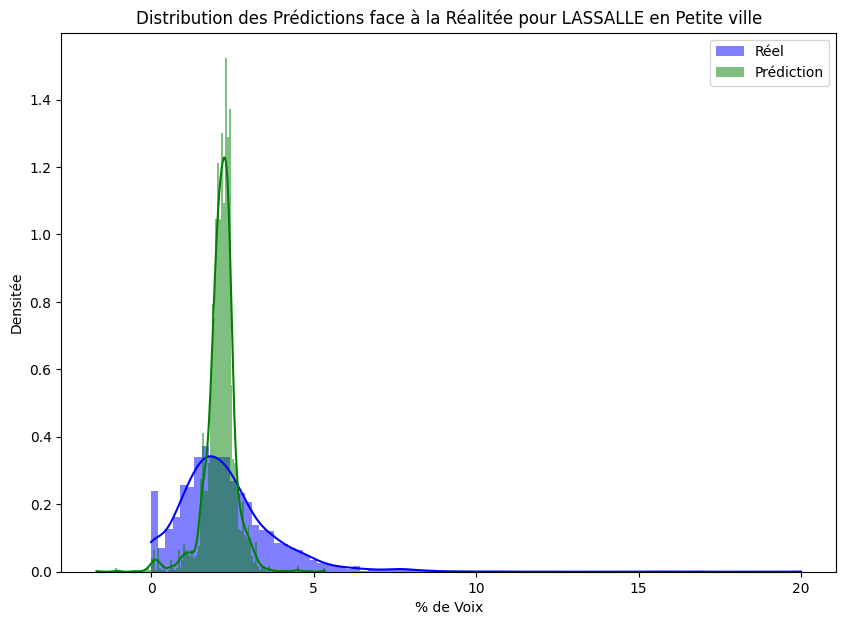

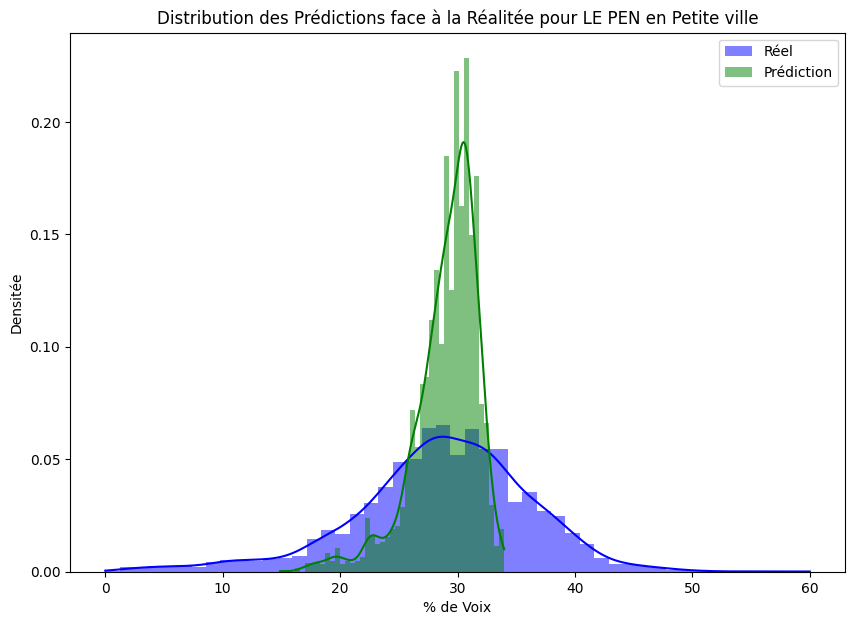

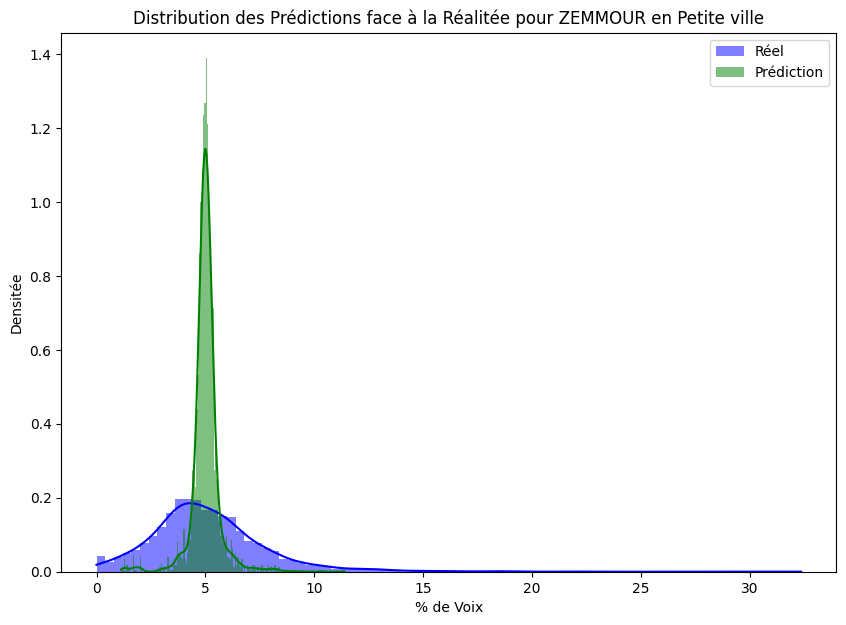

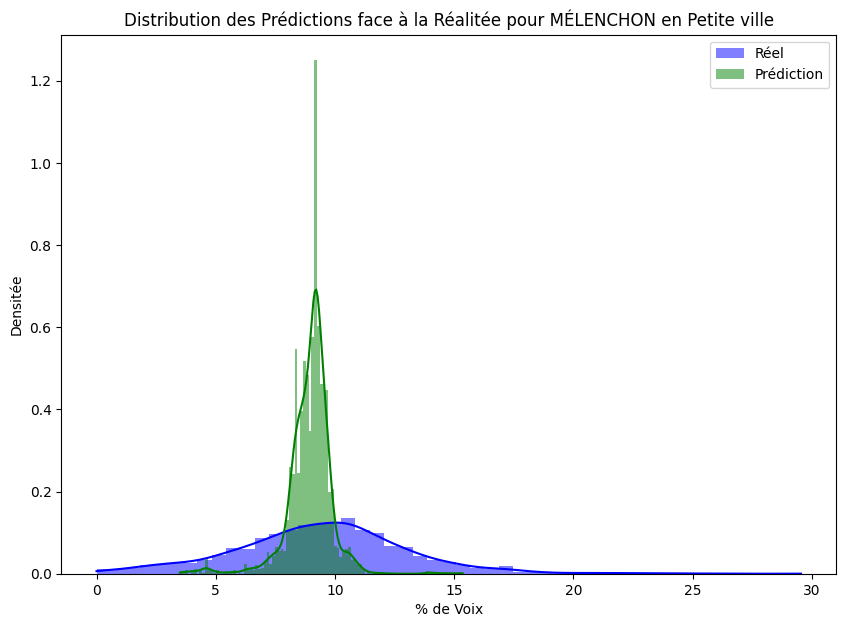

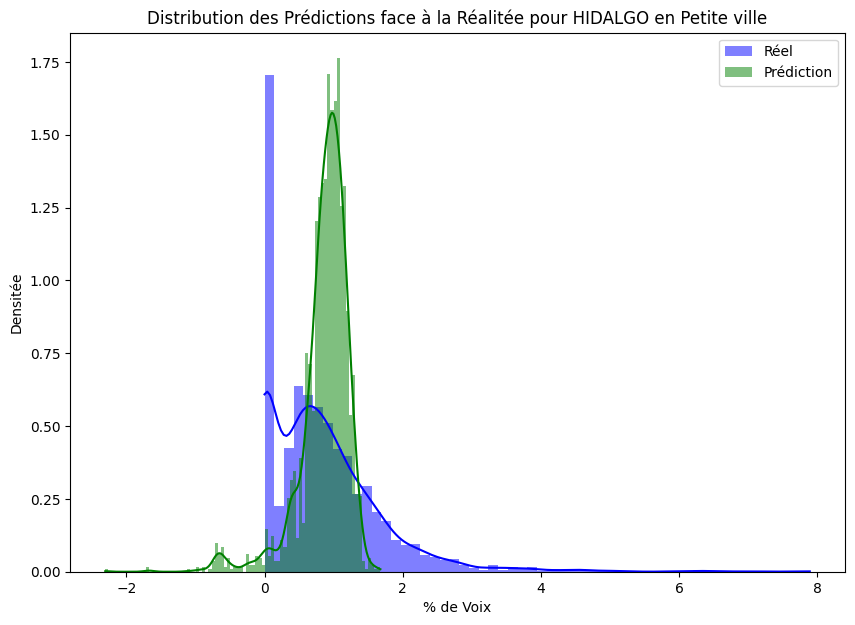

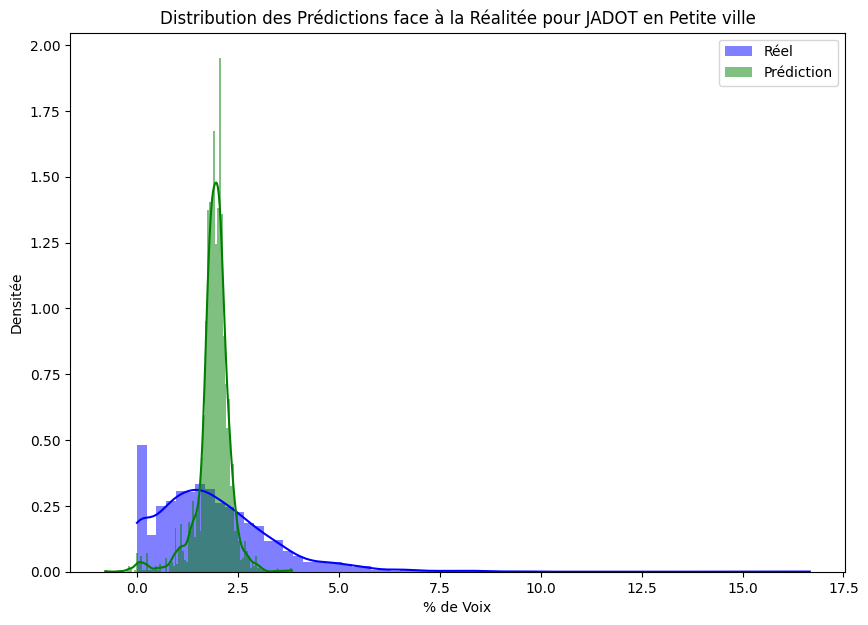

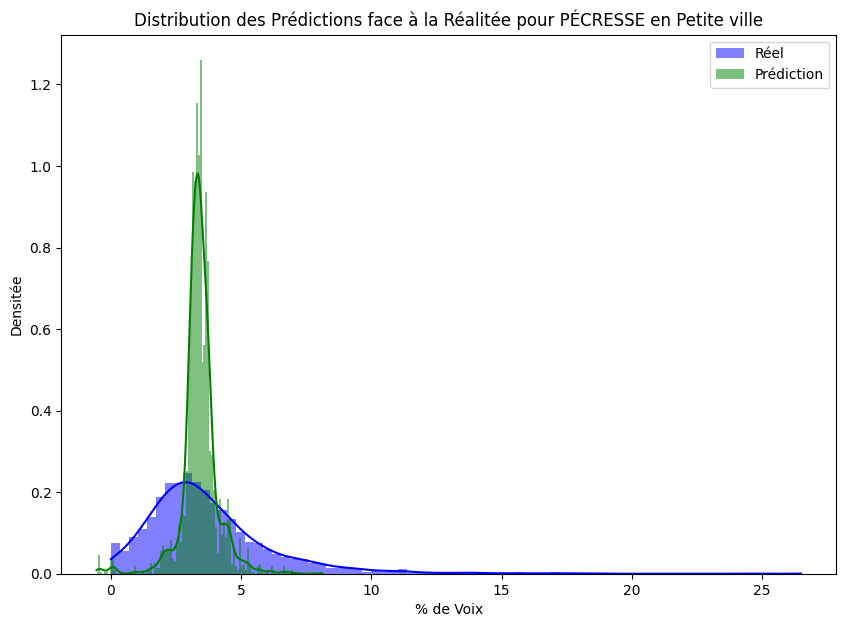

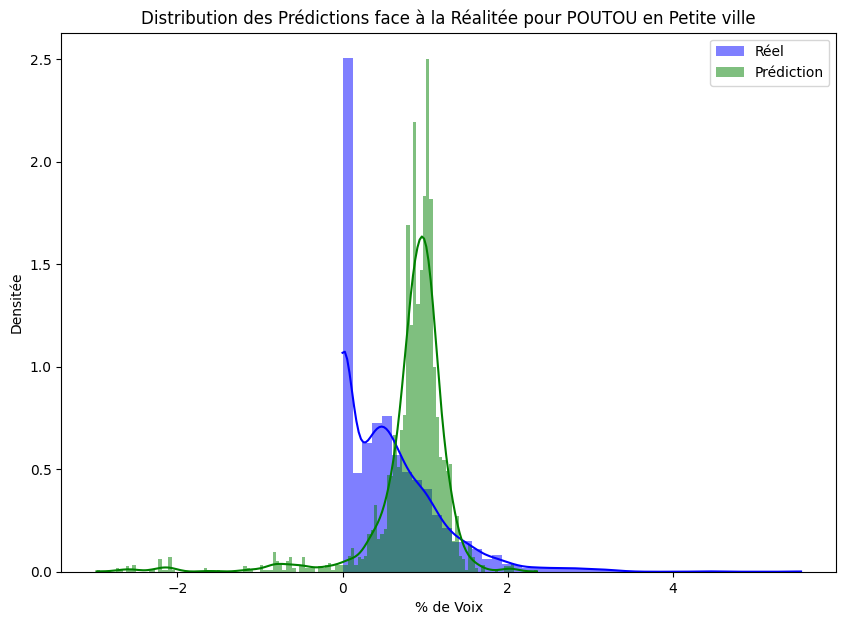

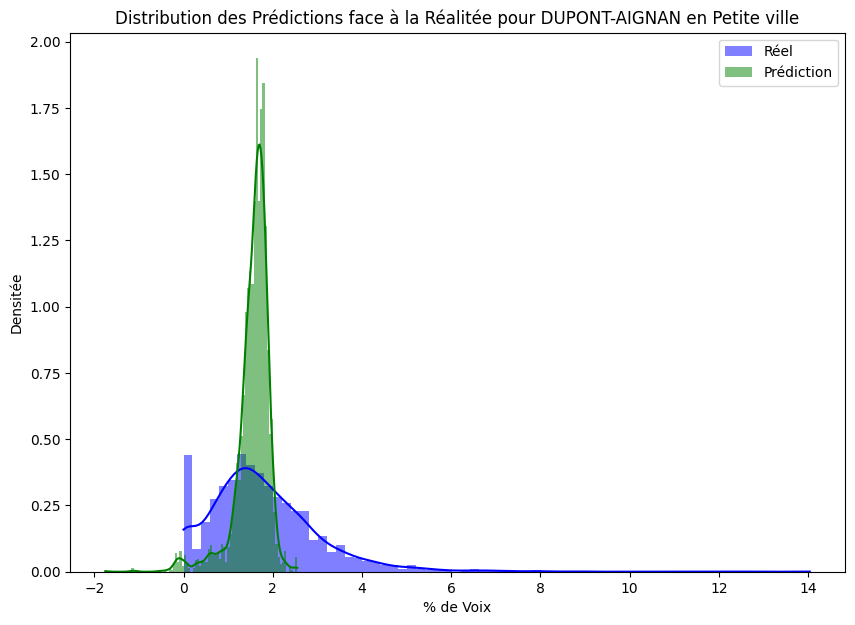

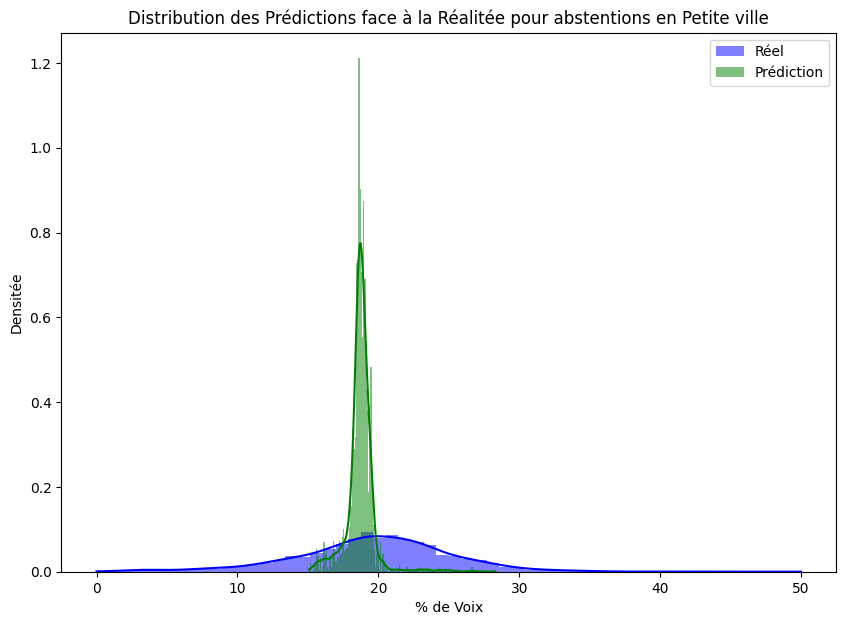

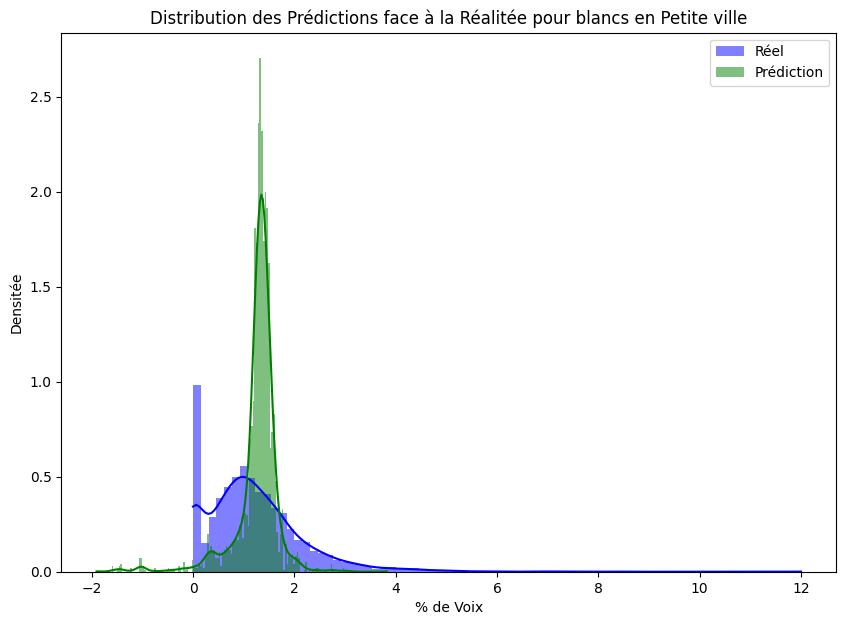

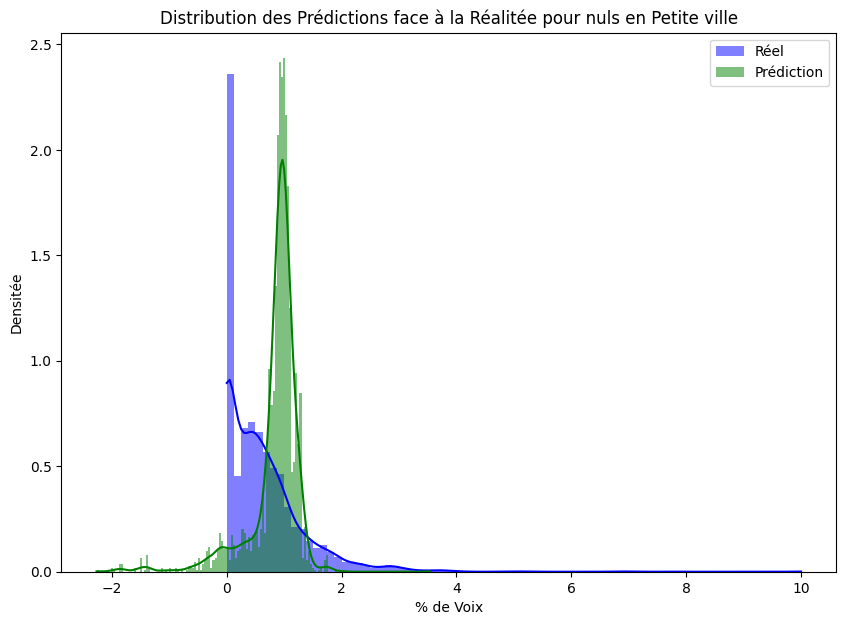

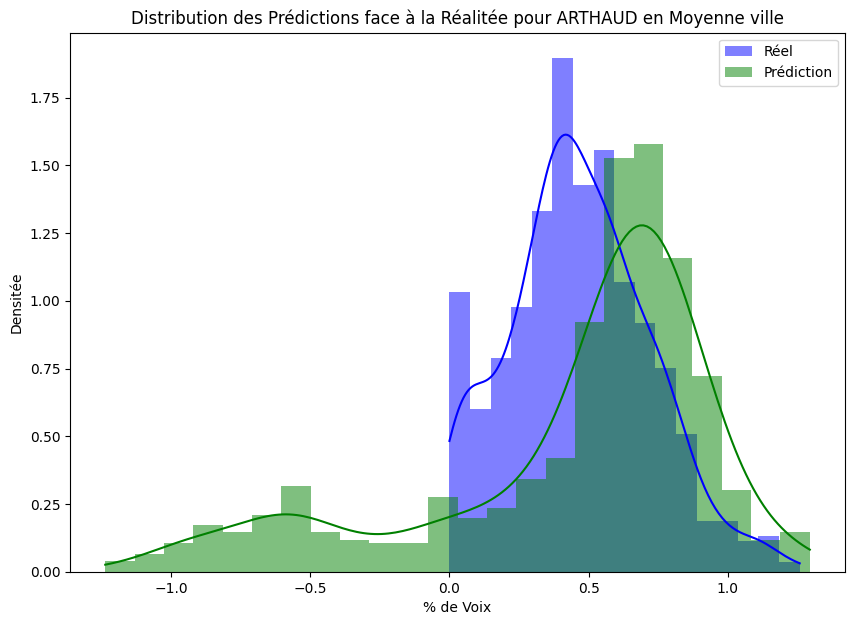

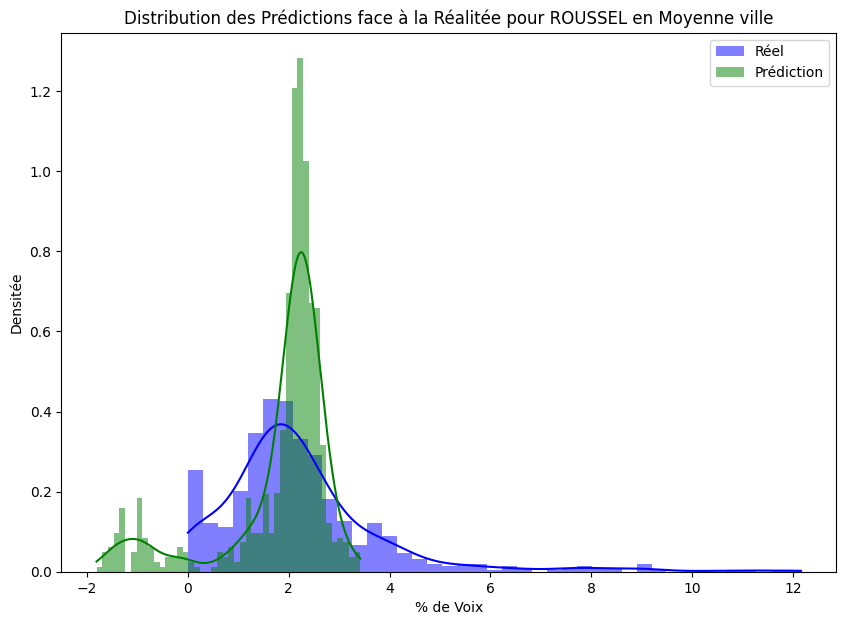

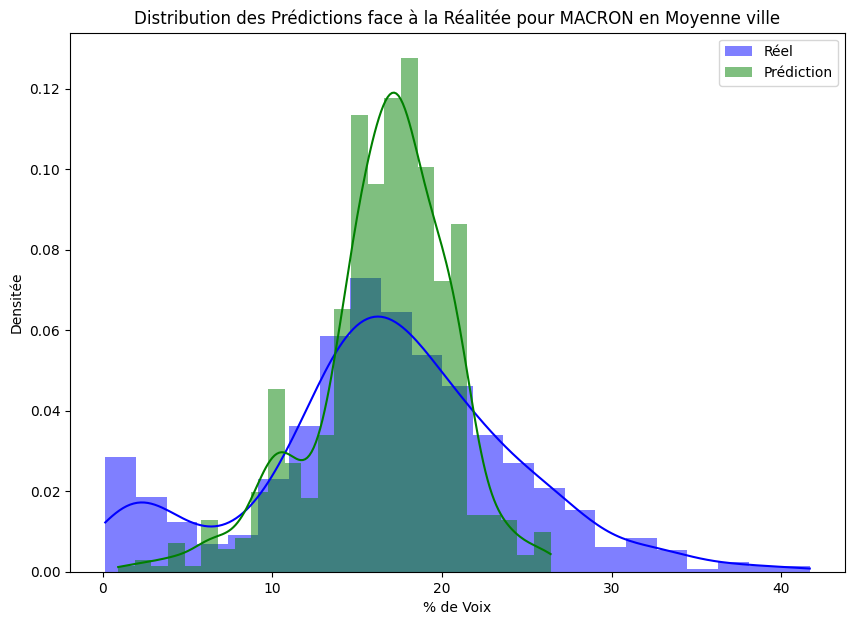

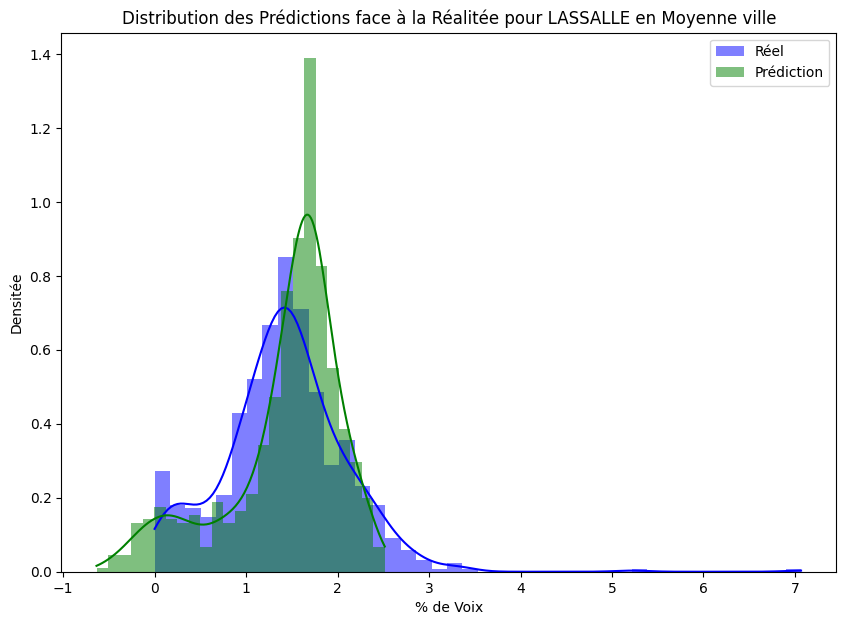

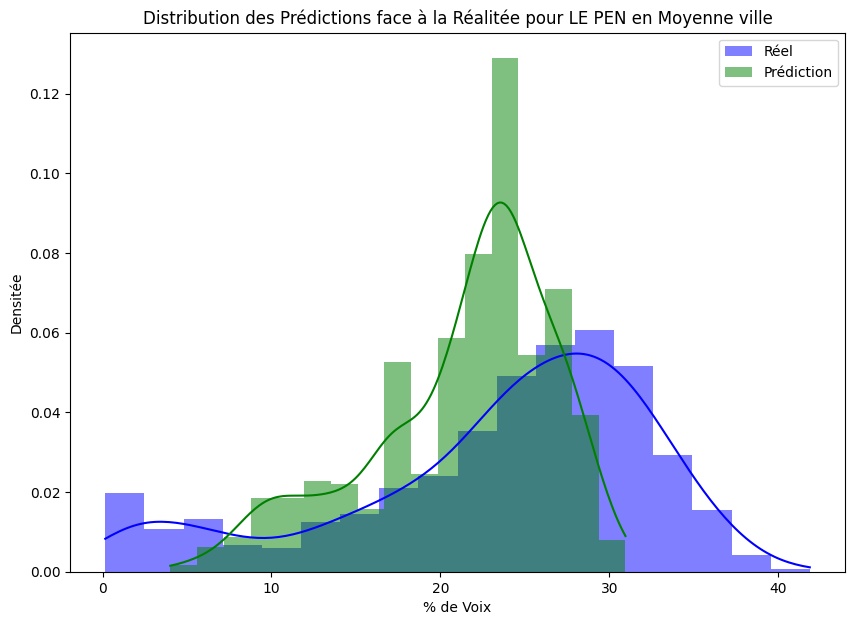

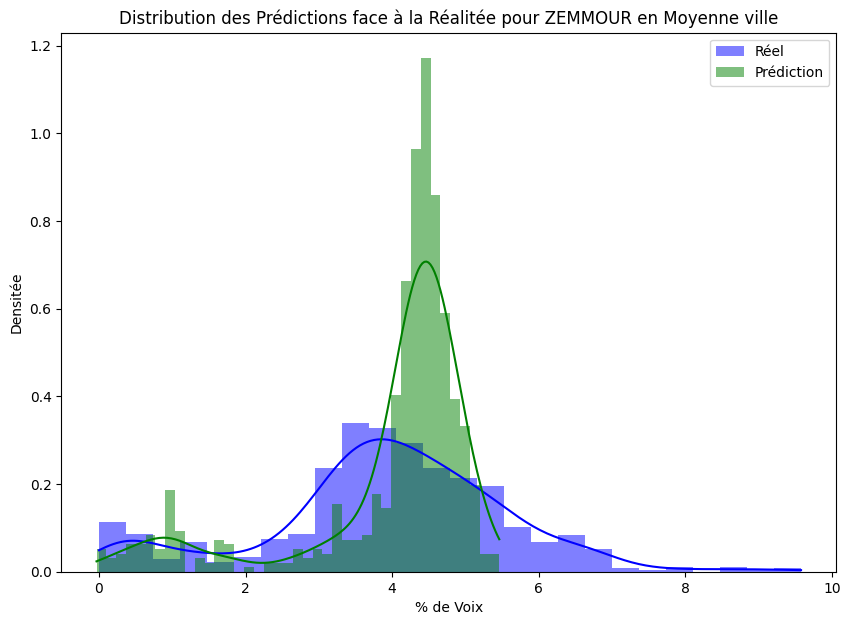

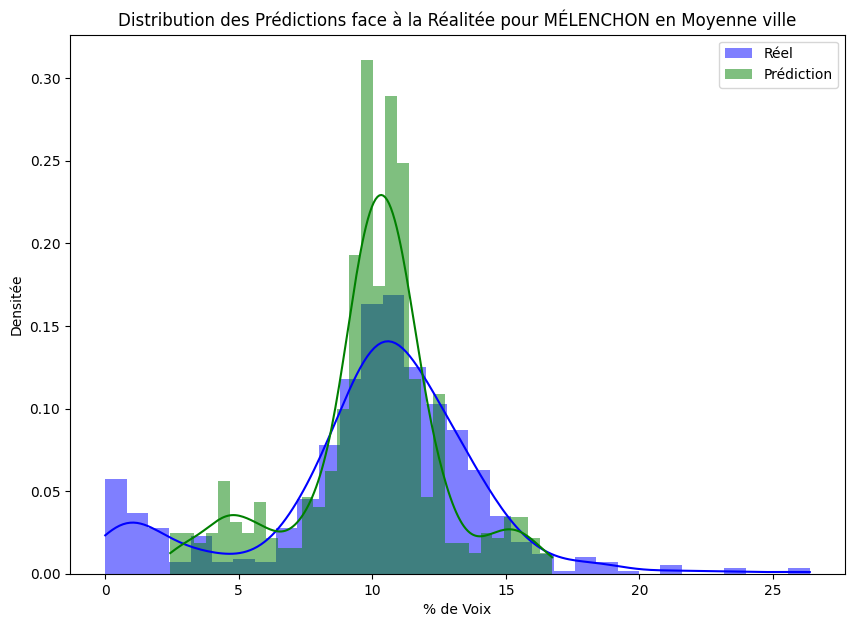

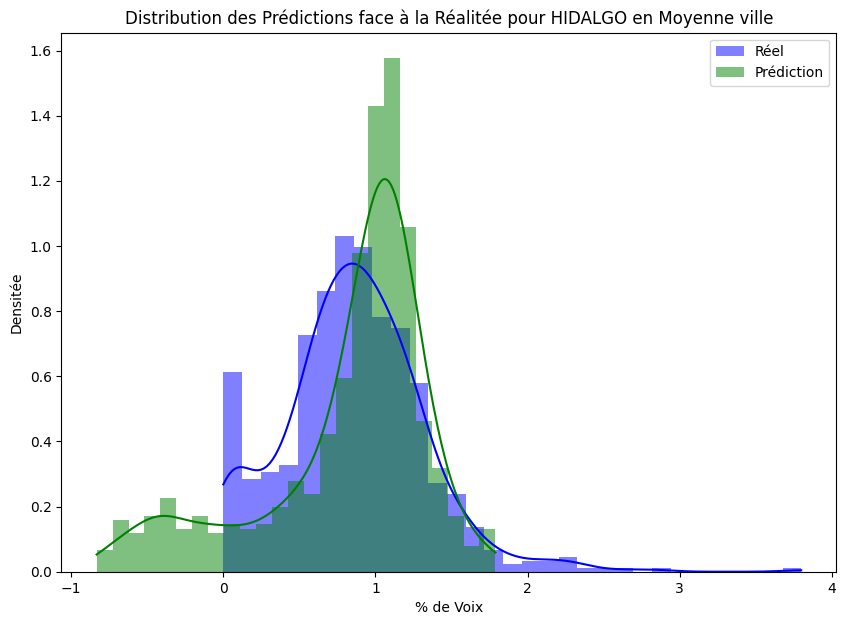

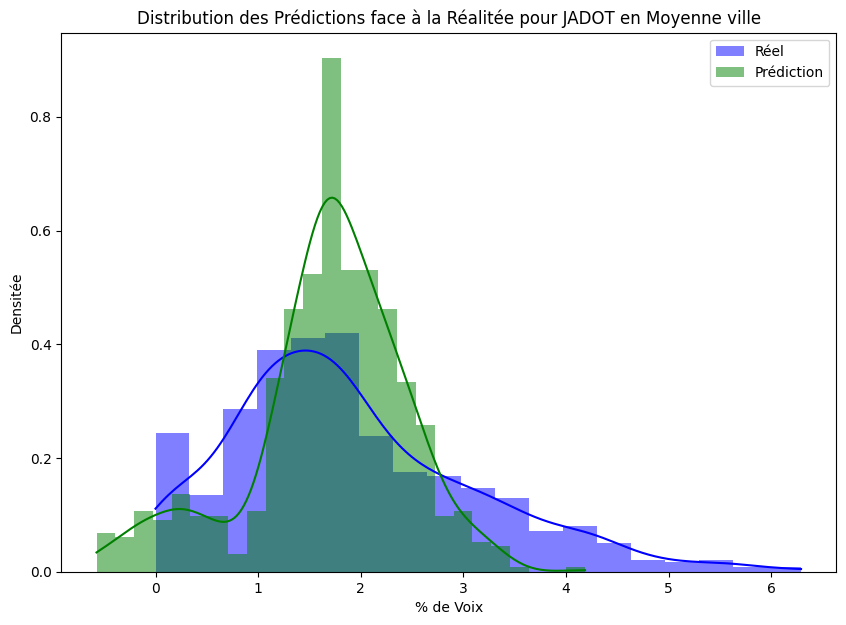

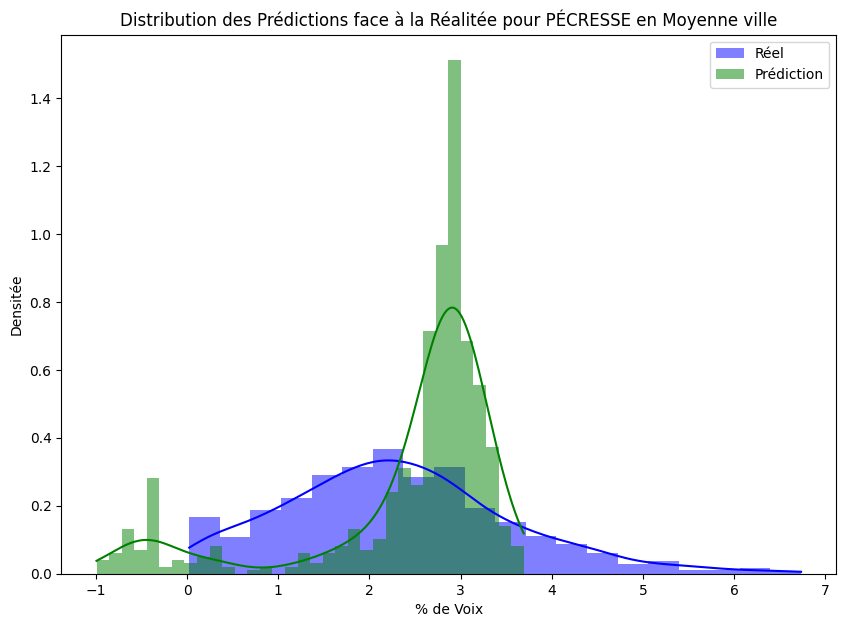

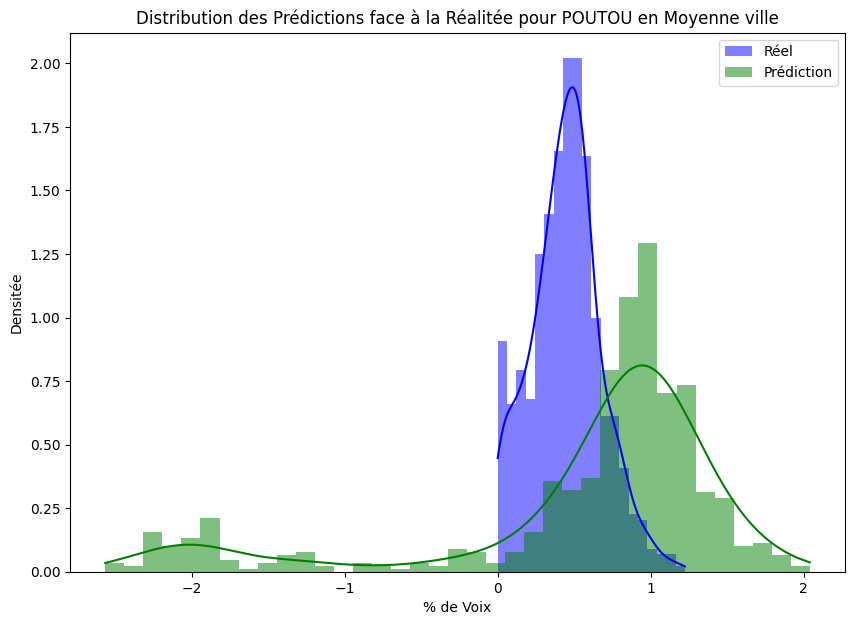

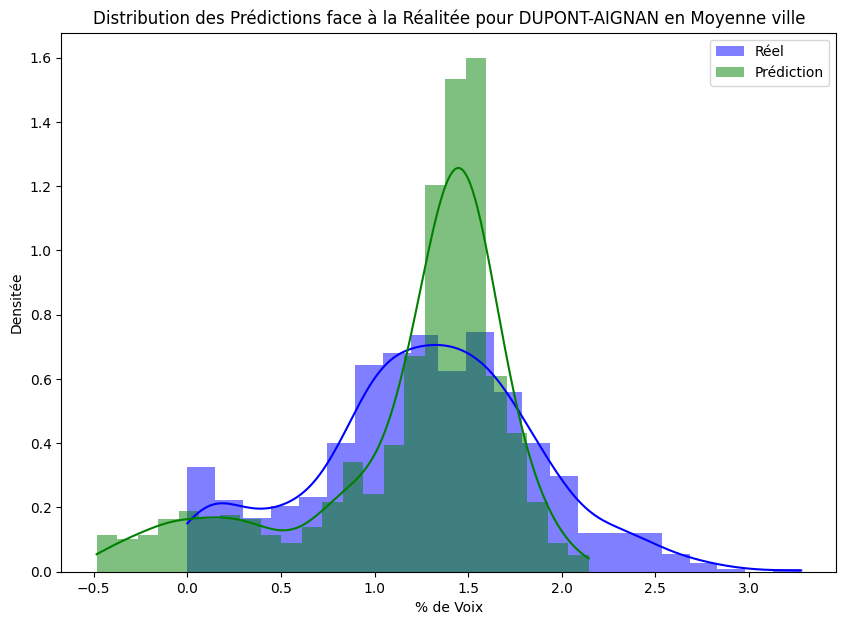

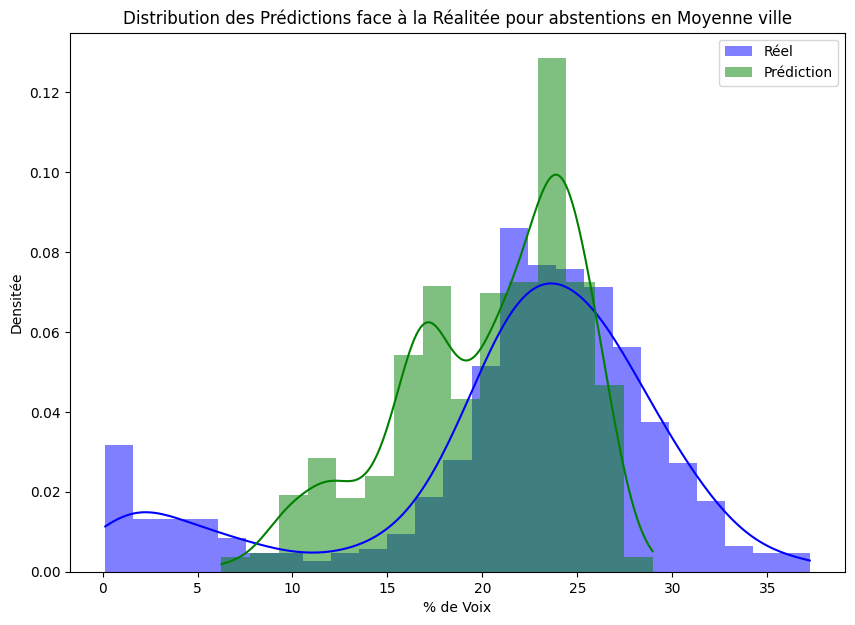

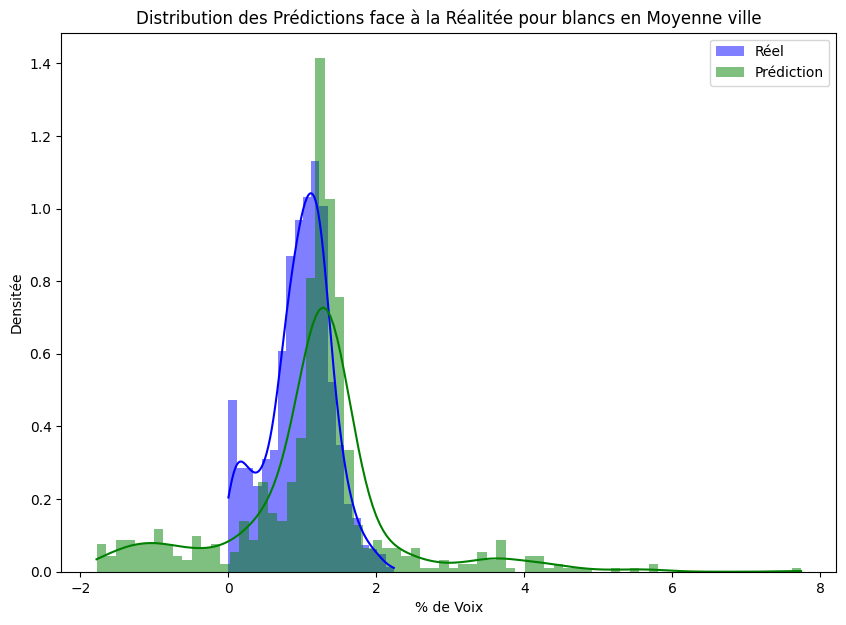

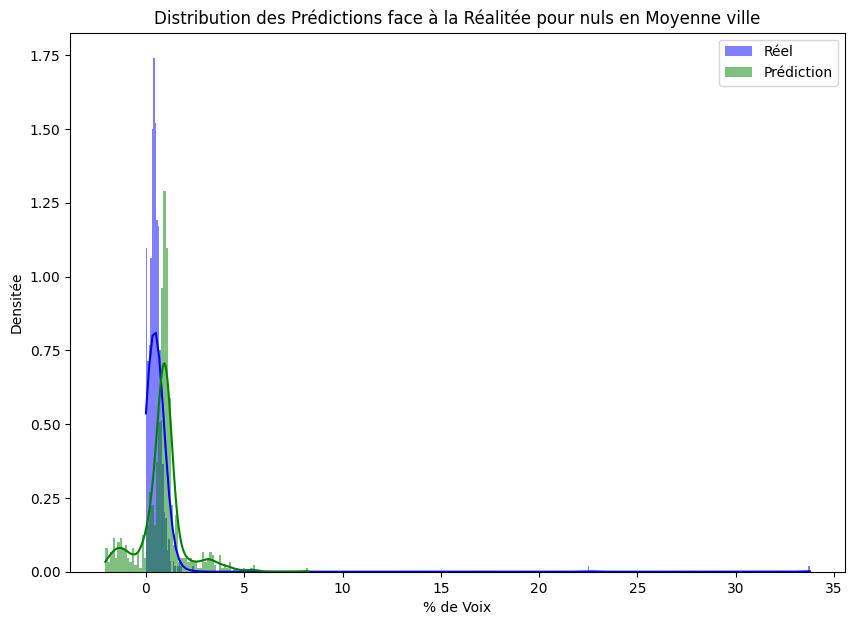

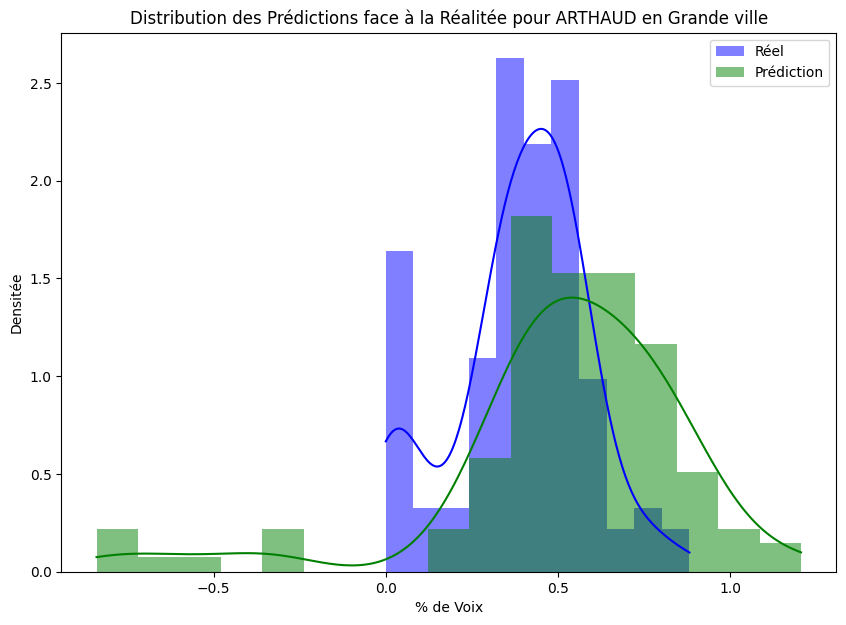

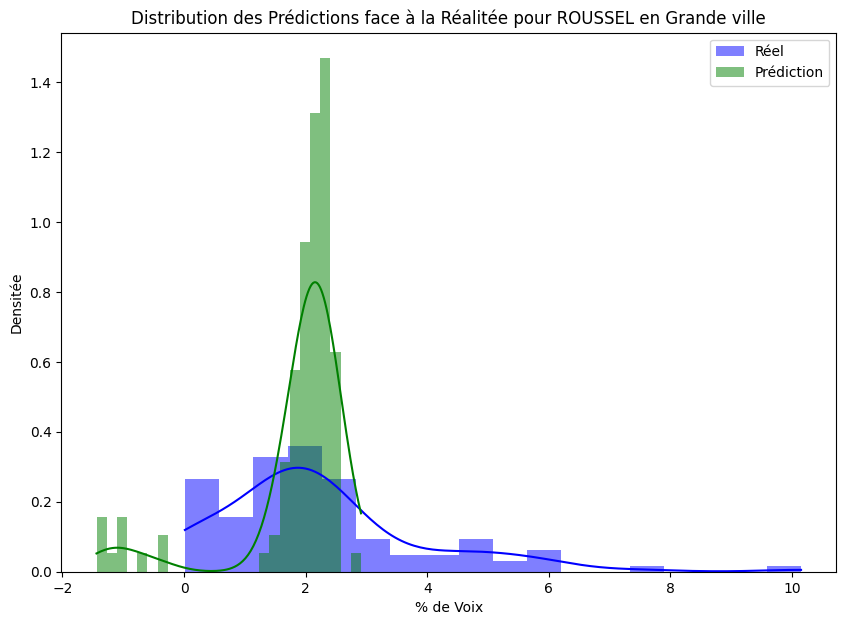

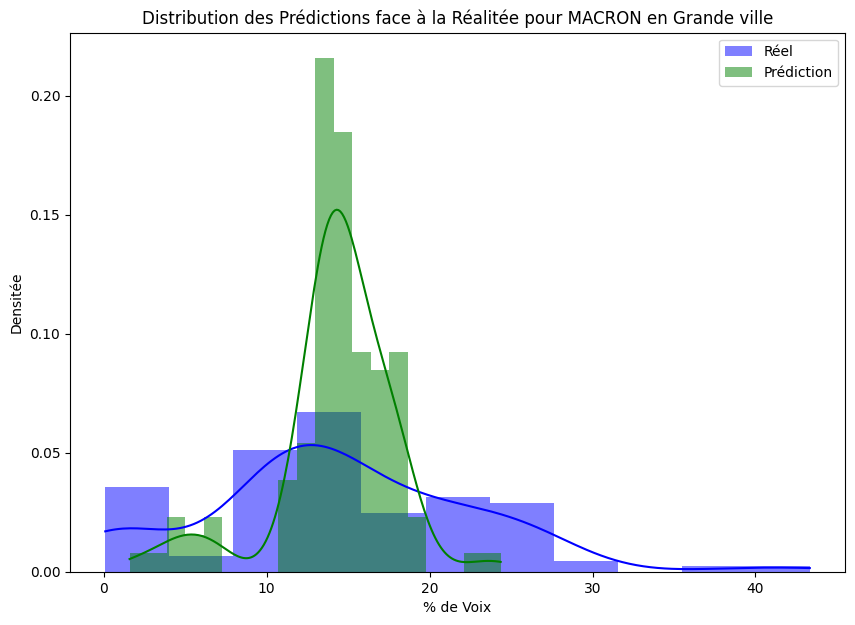

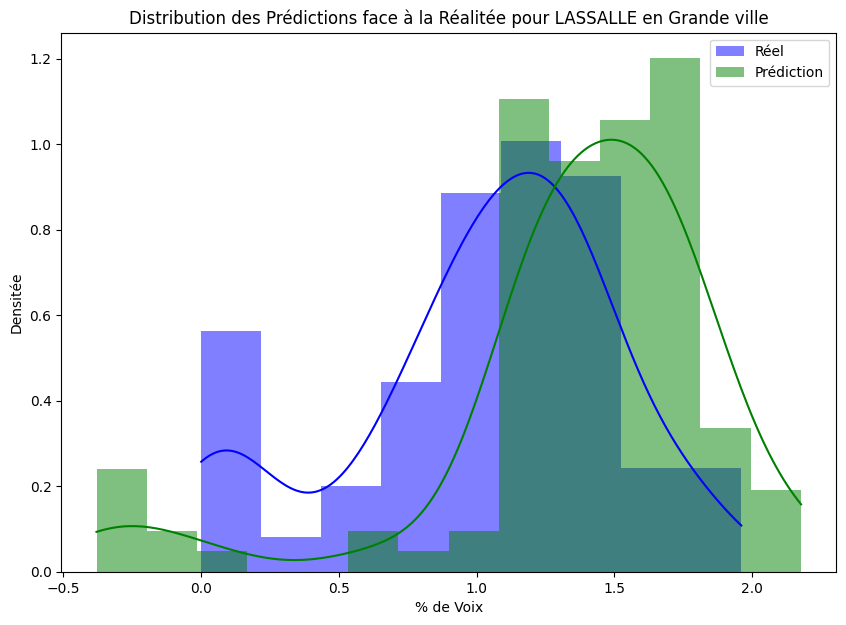

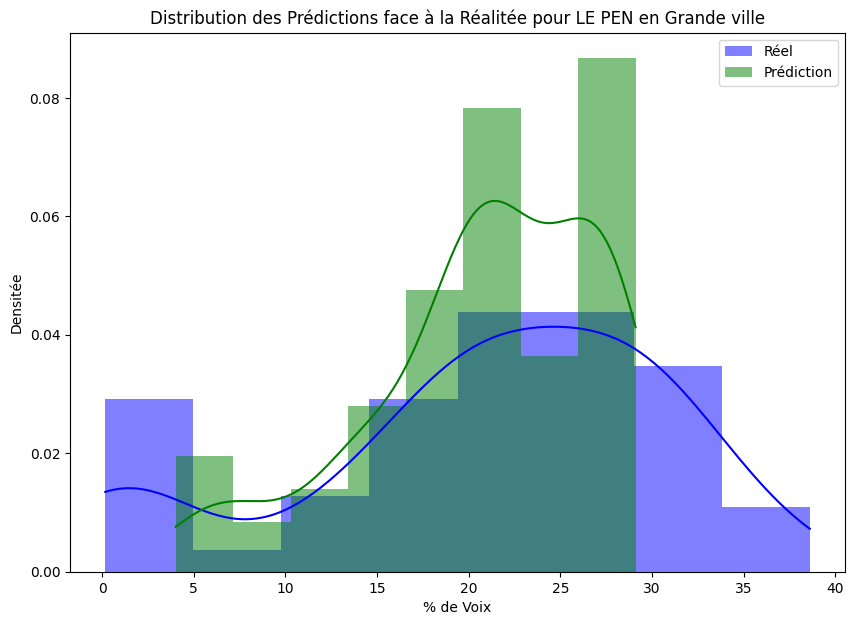

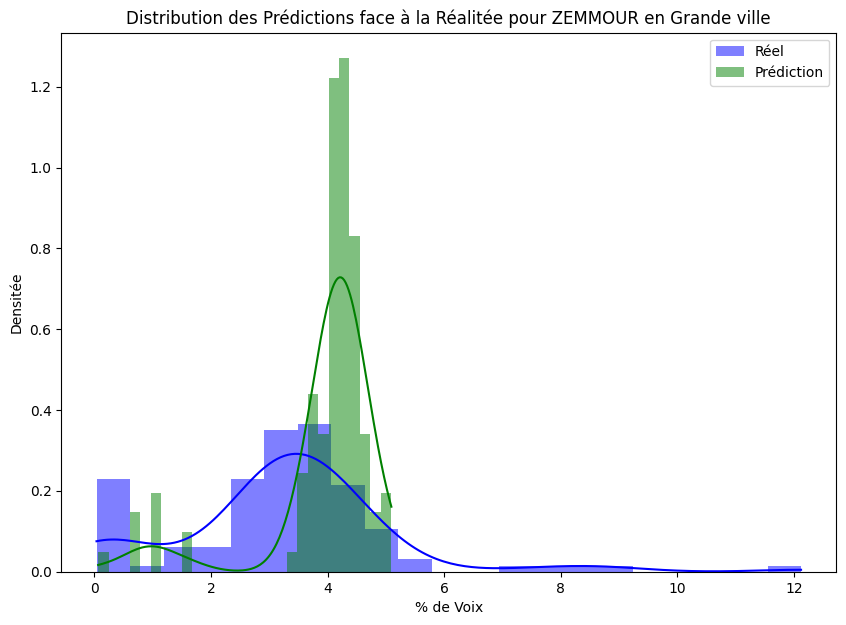

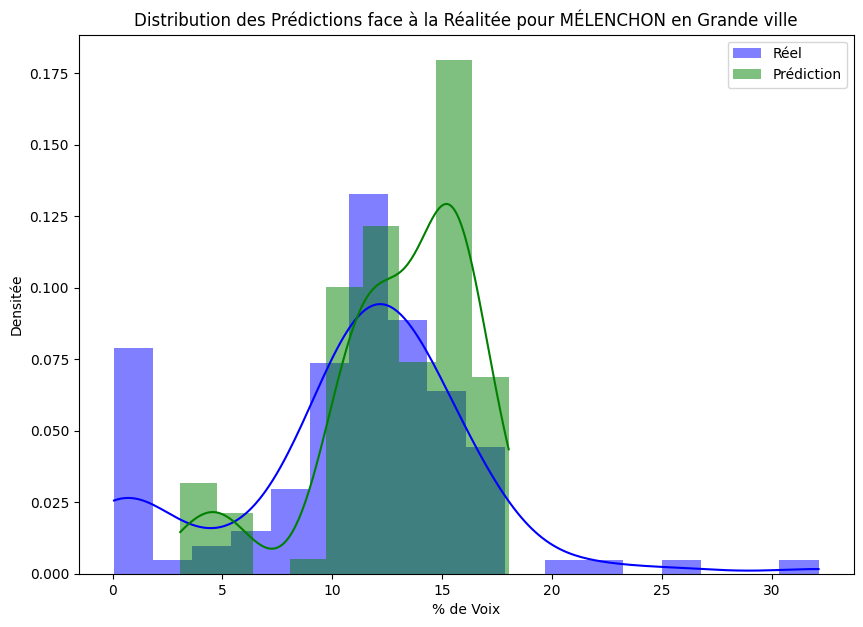

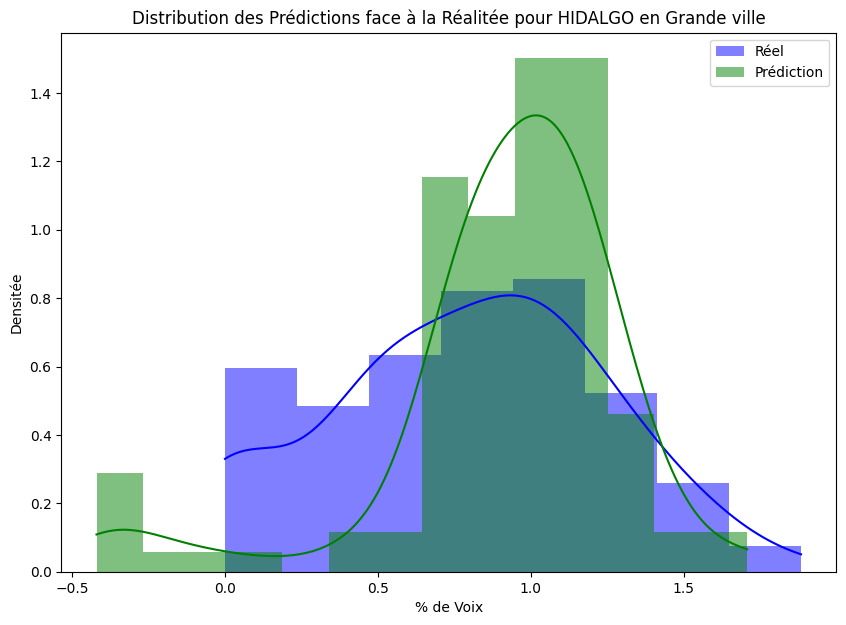

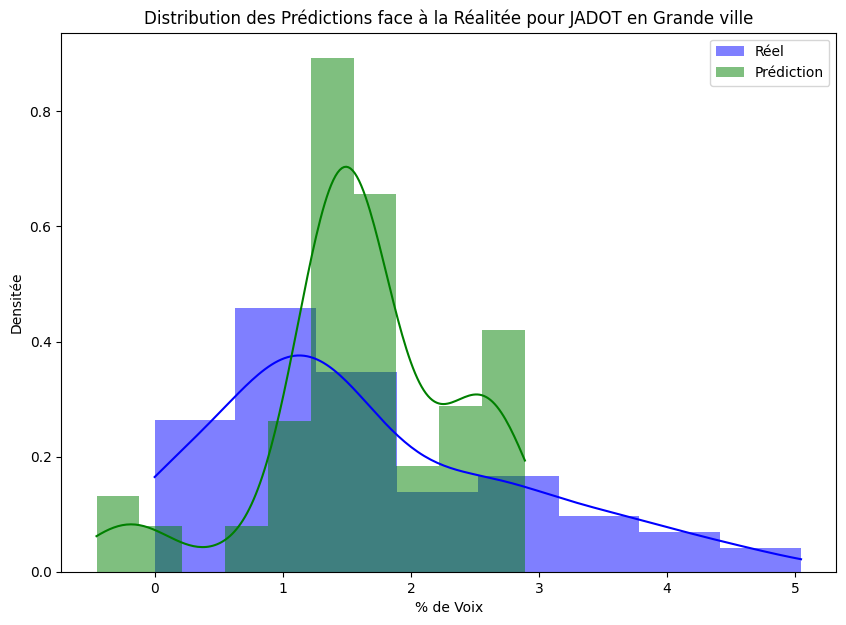

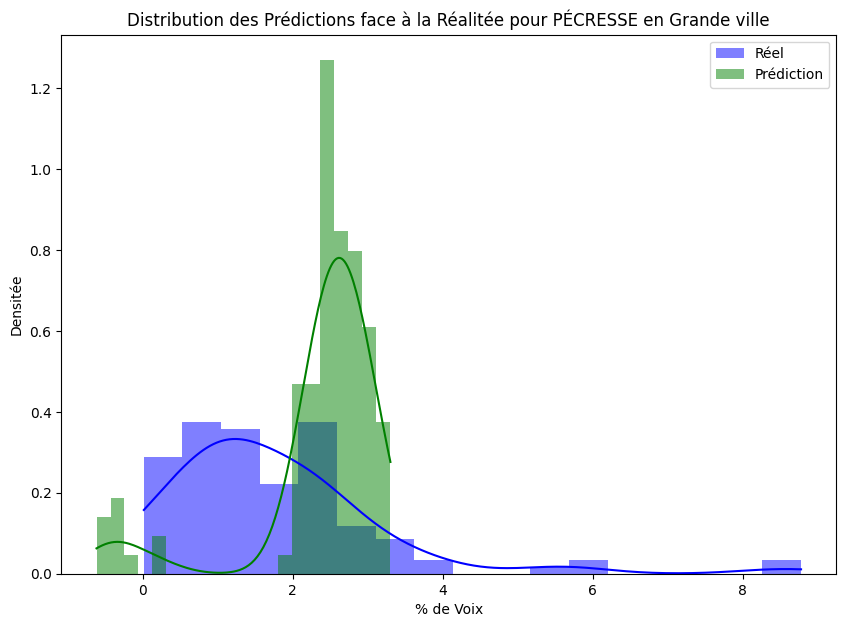

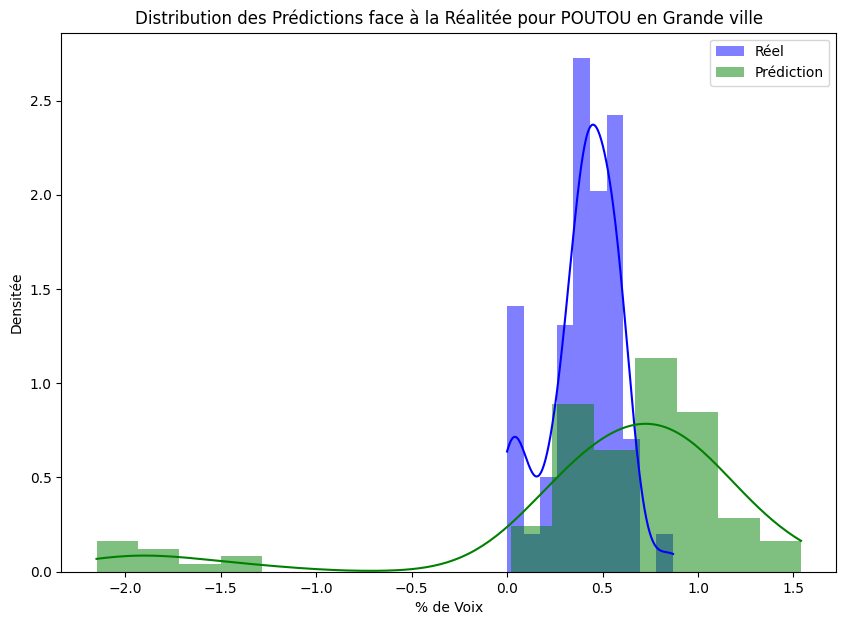

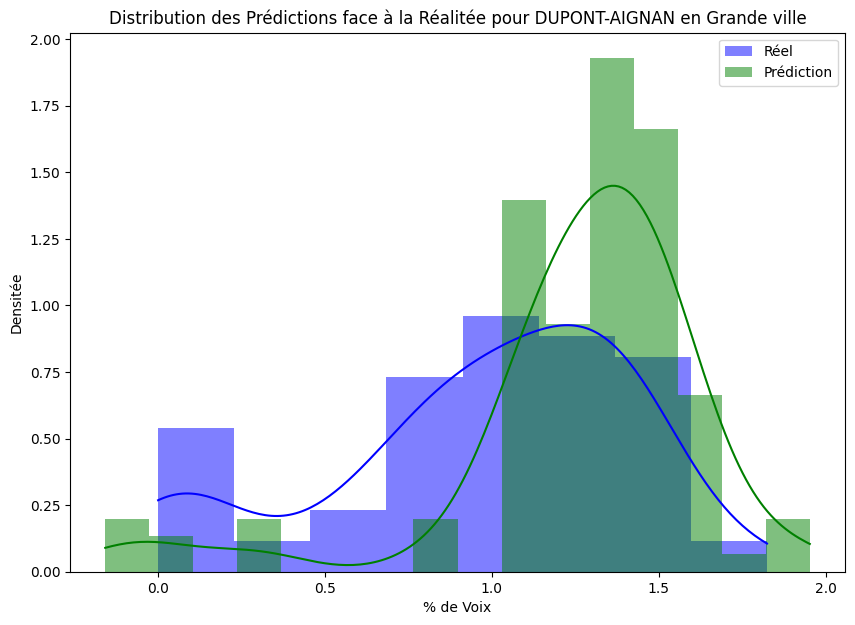

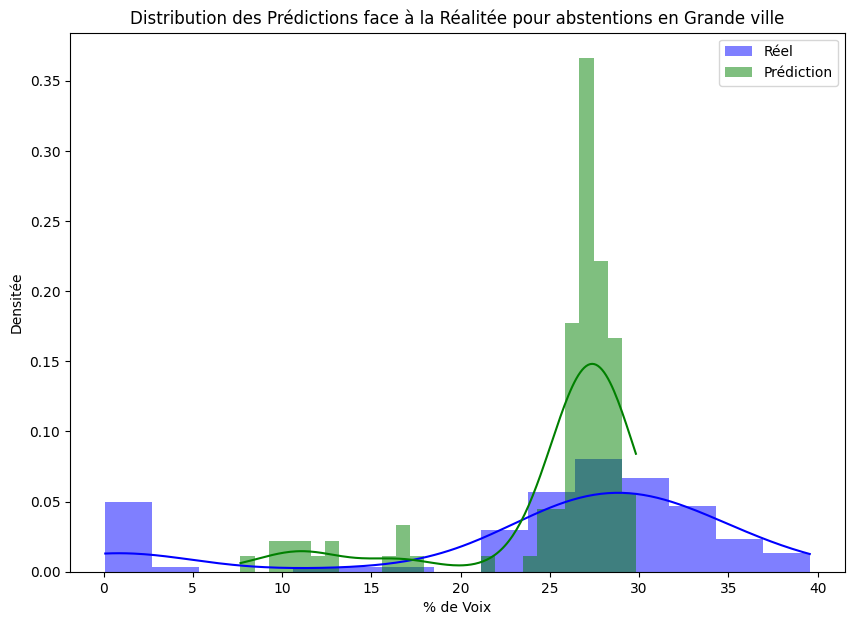

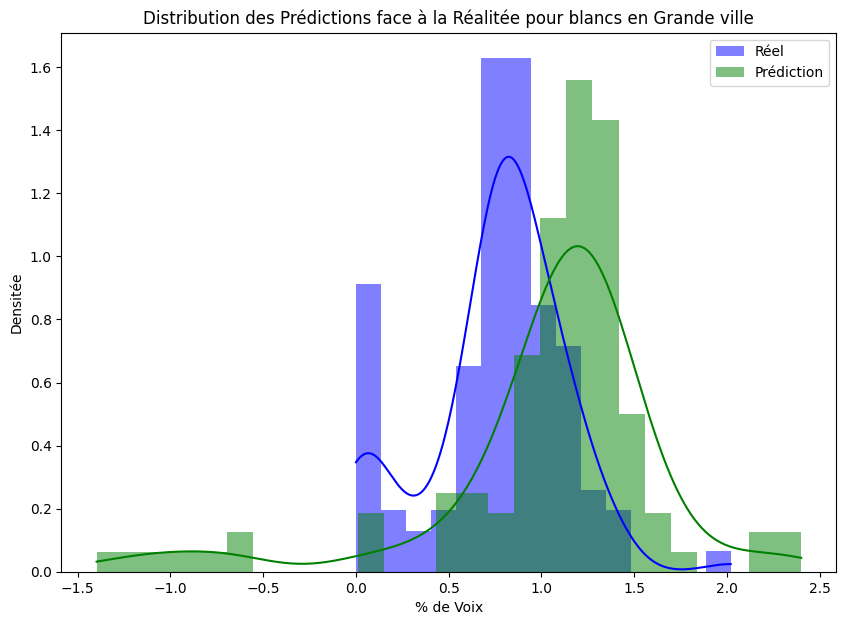

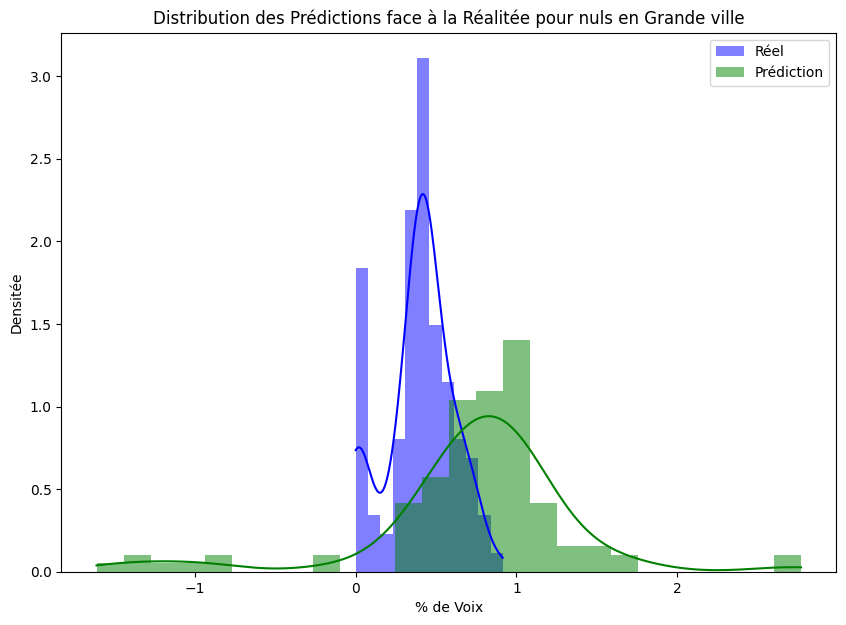

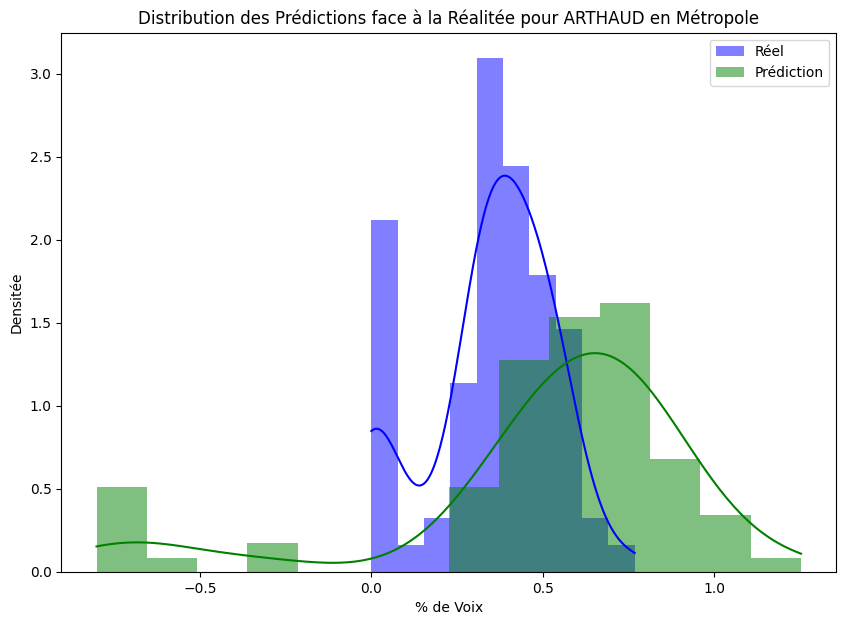

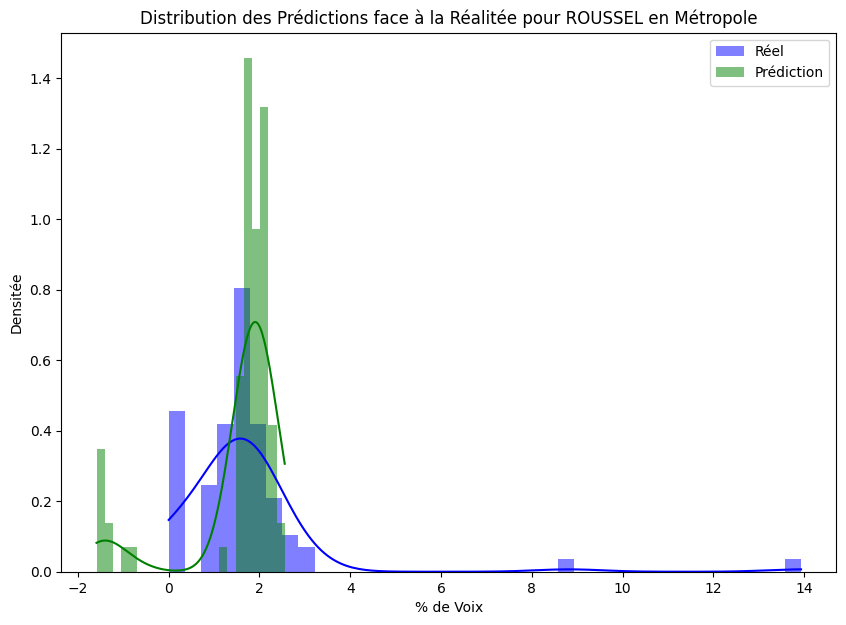

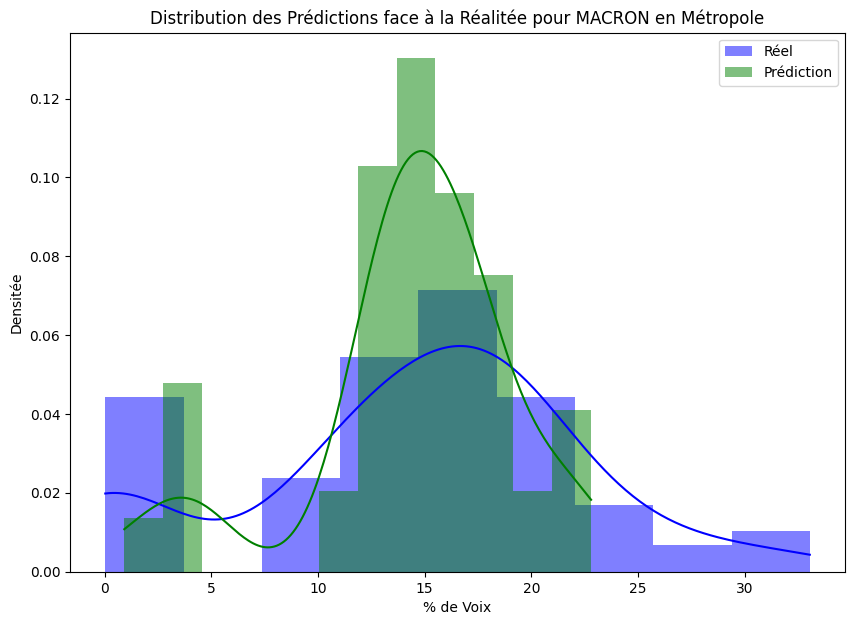

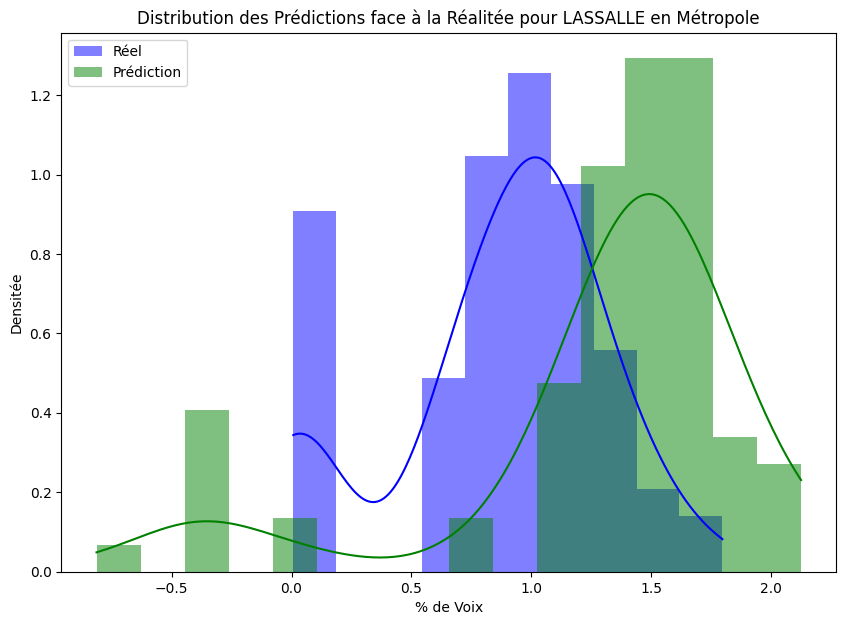

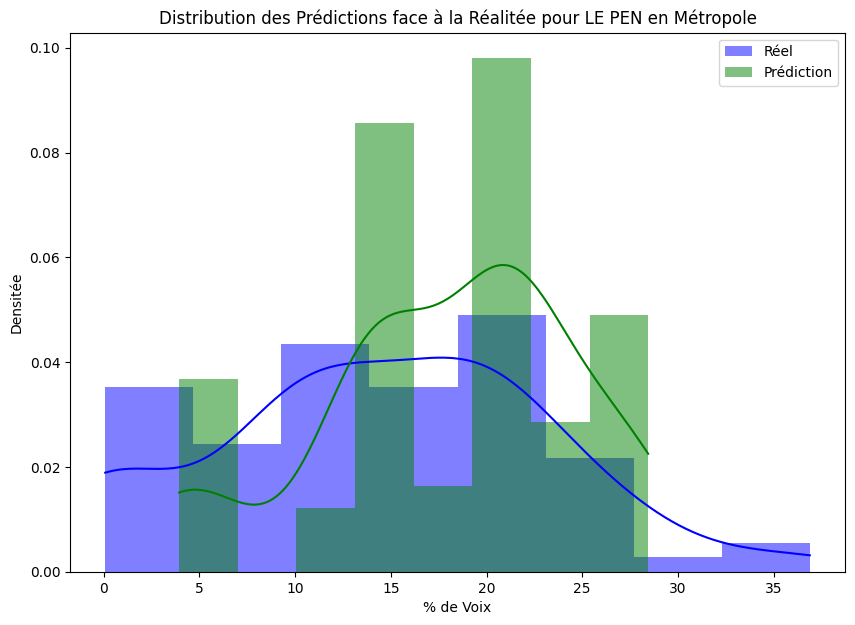

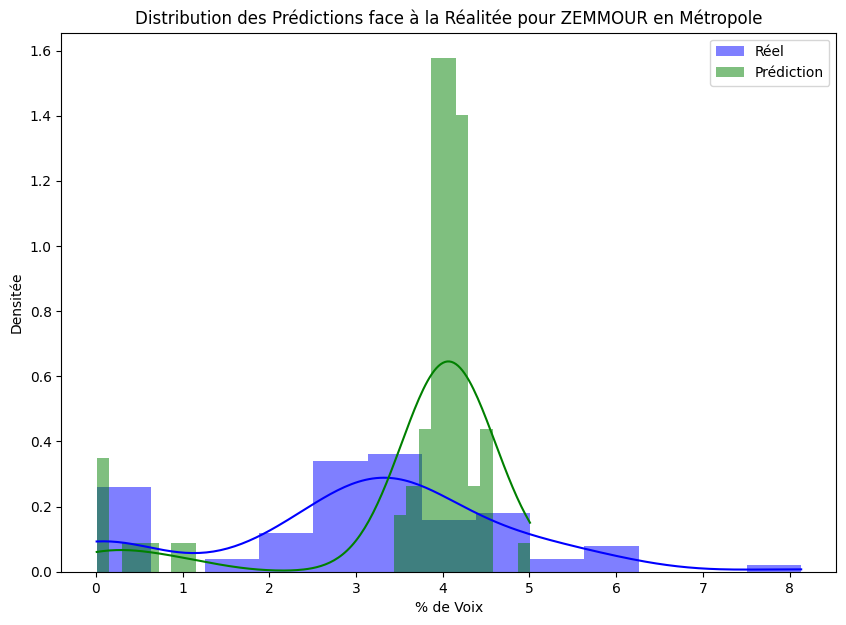

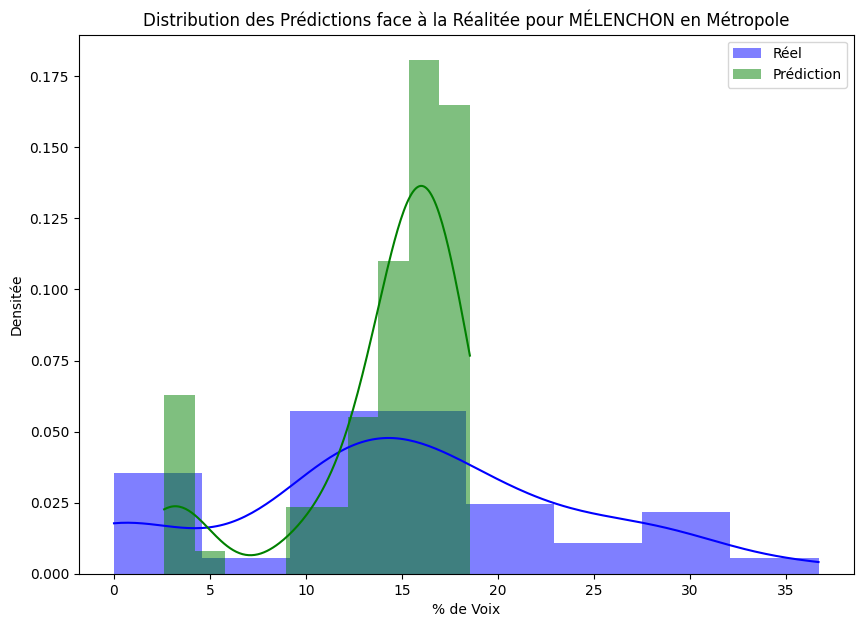

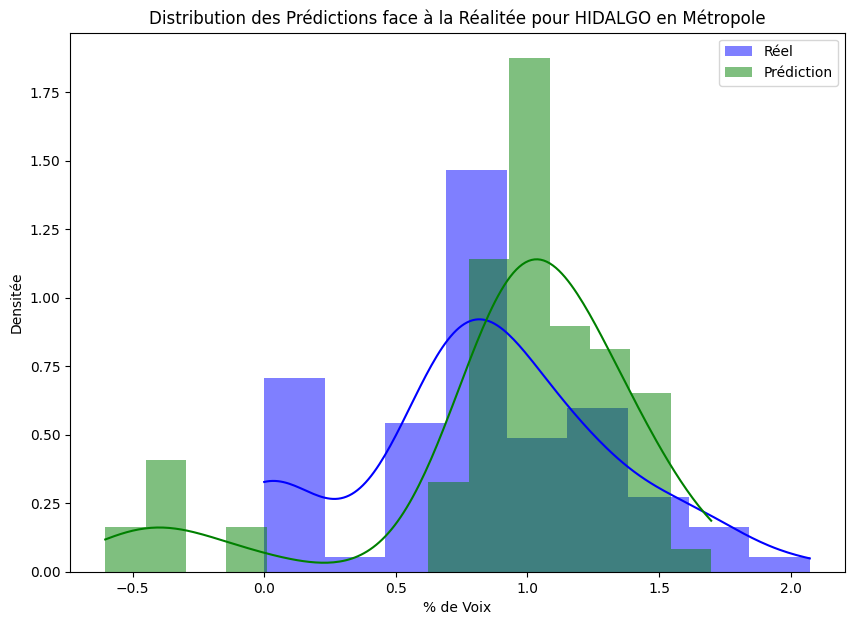

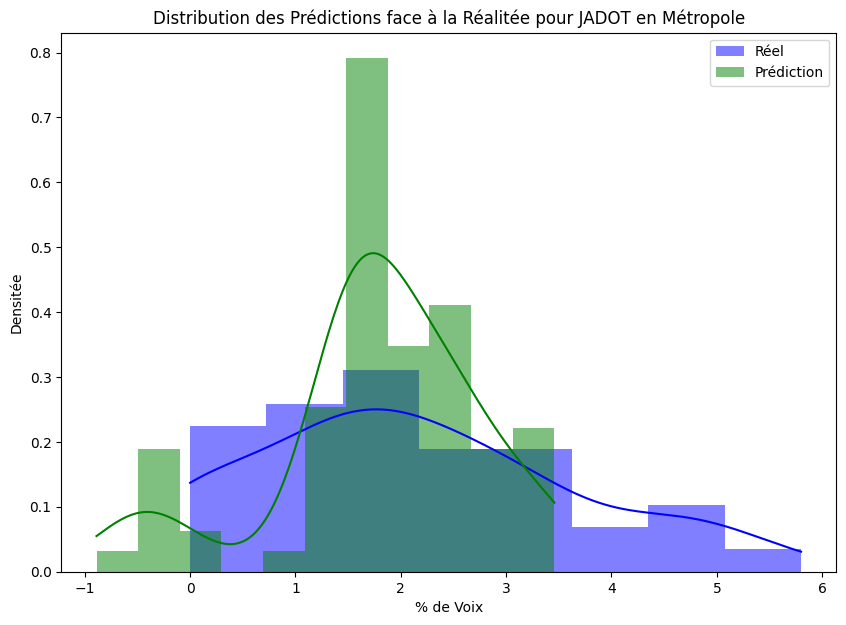

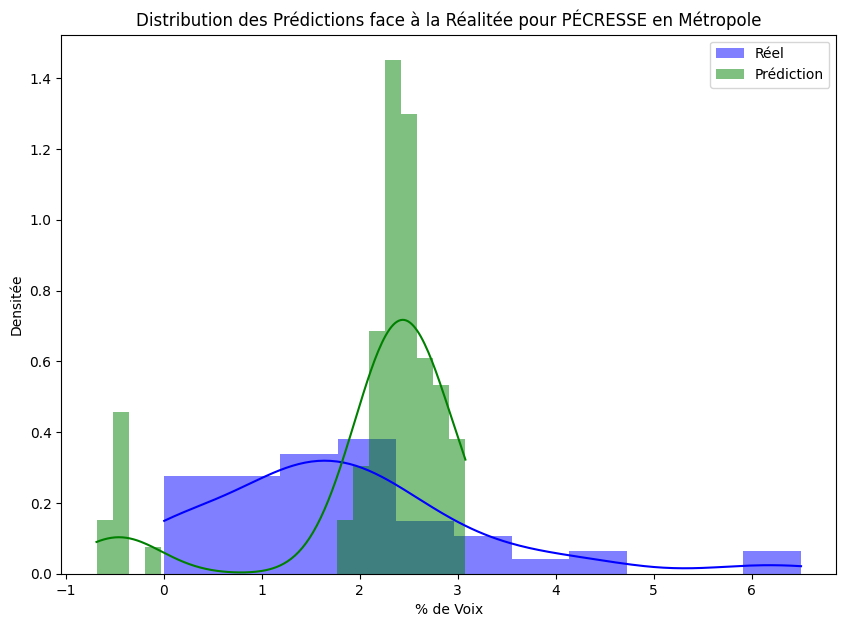

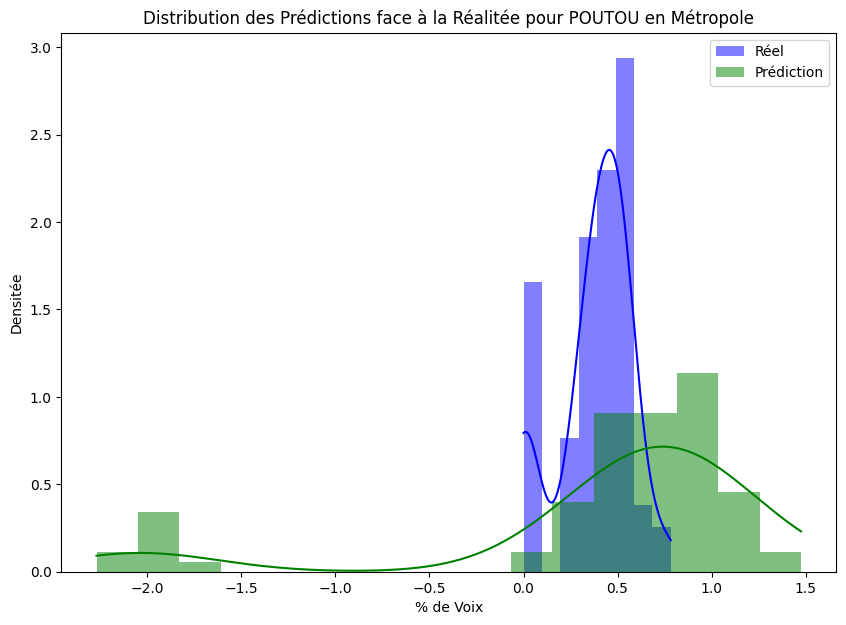

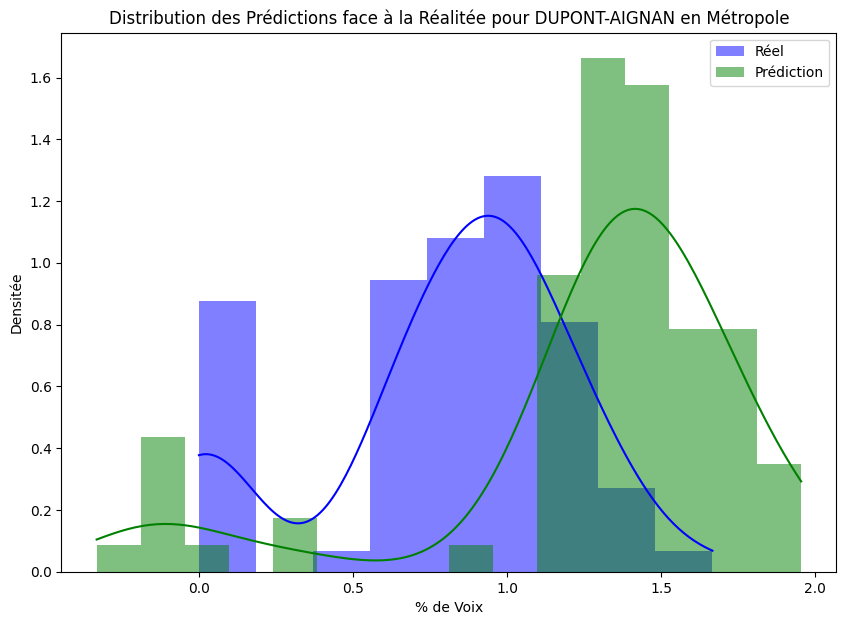

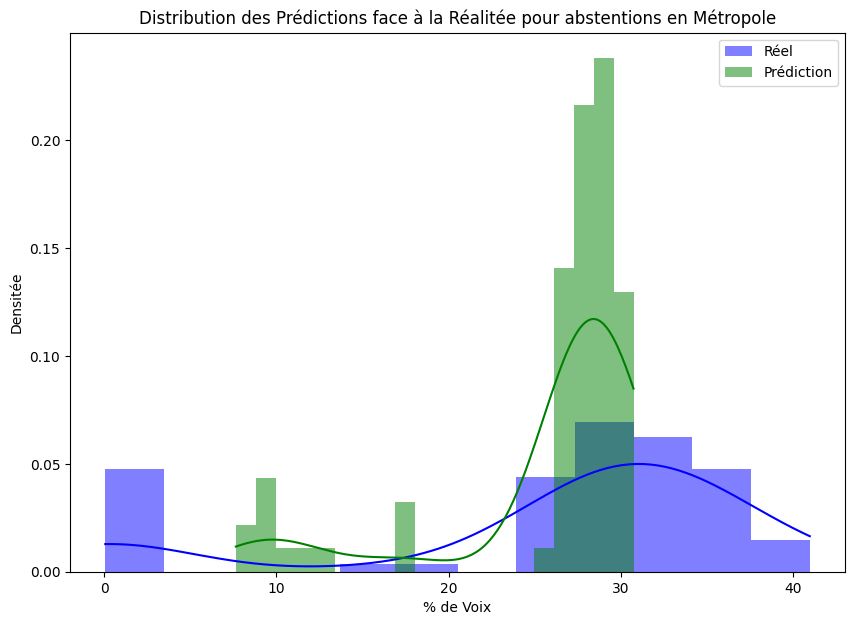

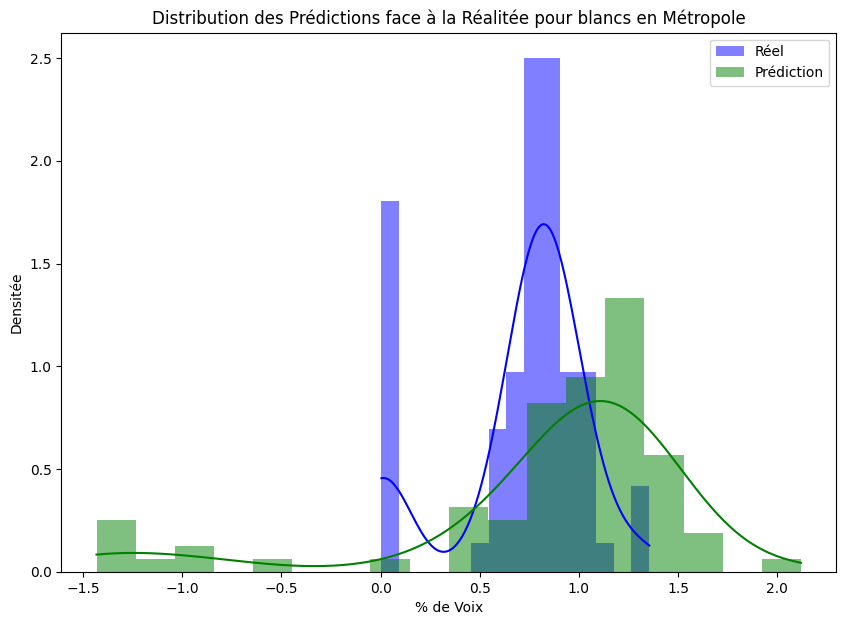

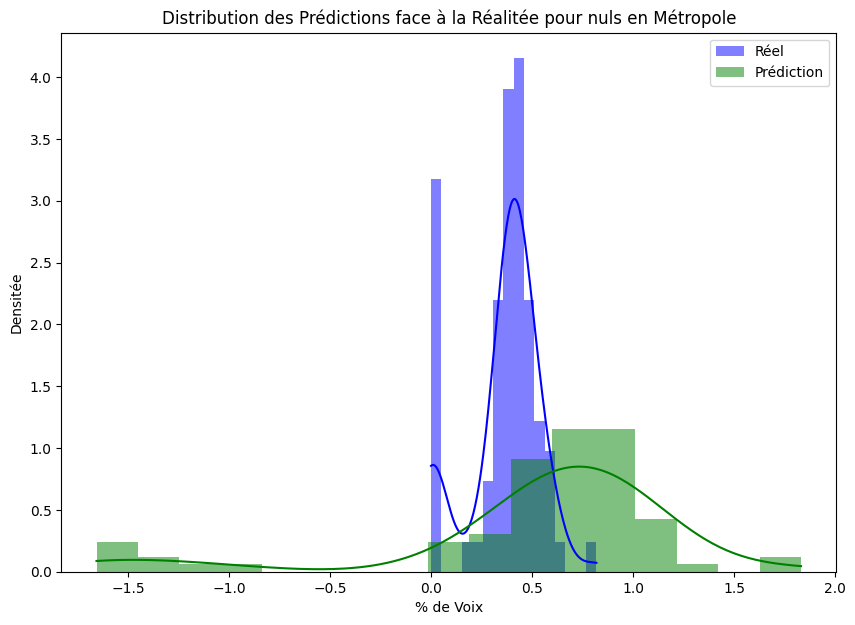

In [12]:
df_results = pd.DataFrame({'Actual': y_test.values.ravel() , 'Predicted': y_pred.flatten(), 'nom': df_all['nom'], 'catégorie': df_all['catégorie']})
labels = ['Petite ville', 'Moyenne ville', 'Grande ville', 'Métropole']
for category in labels:

    filtered_df = df_results[df_results['catégorie'] == category]

    unique_noms = filtered_df['nom'].unique()
    for nom_value in unique_noms:
        subset = filtered_df[filtered_df['nom'] == nom_value]
        plt.figure(figsize=(10, 7))
        sns.histplot(subset['Actual'], color='blue', kde=True, label='Réel', stat="density", linewidth=0)
        sns.histplot(subset['Predicted'], color='green', kde=True, label='Prédiction', stat="density", linewidth=0)
        plt.xlabel('% de Voix')
        plt.ylabel('Densitée')
        plt.title(f'Distribution des Prédictions face à la Réalitée pour {nom_value} en {category}')
        plt.legend()
        plt.show()


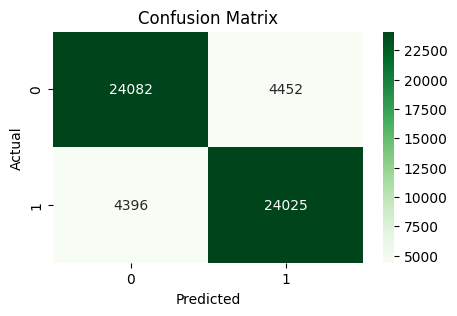

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_test_bin = np.where(y_test > y_test.median(), 1, 0)
y_pred_bin = np.where(y_pred > np.median(y_pred), 1, 0)

cm = confusion_matrix(y_test_bin, y_pred_bin)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
df_results['Squared_Error'] = (df_results['Actual'] - df_results['Predicted']) ** 2
print(df_results['Squared_Error'])

0         0.155166
1         1.132928
2        49.081449
3         0.012798
4        57.221692
           ...    
56950     0.483624
56951     1.194850
56952     5.330236
56953     0.054382
56954     0.842463
Name: Squared_Error, Length: 56955, dtype: float64


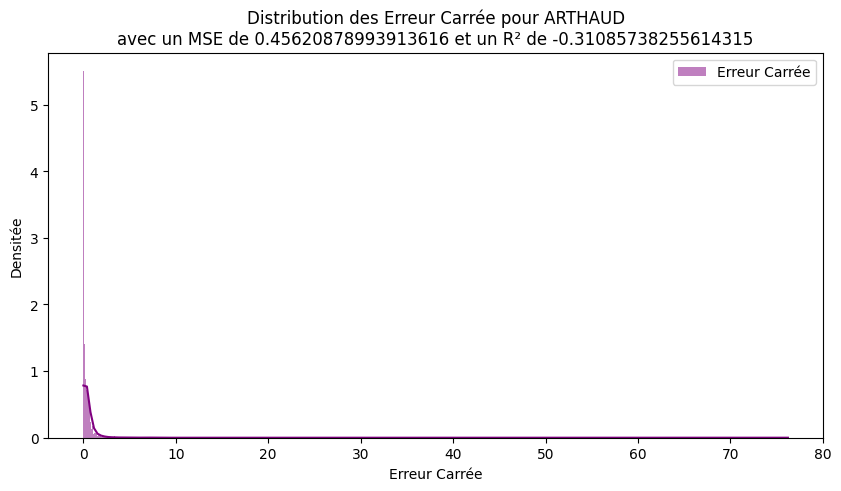

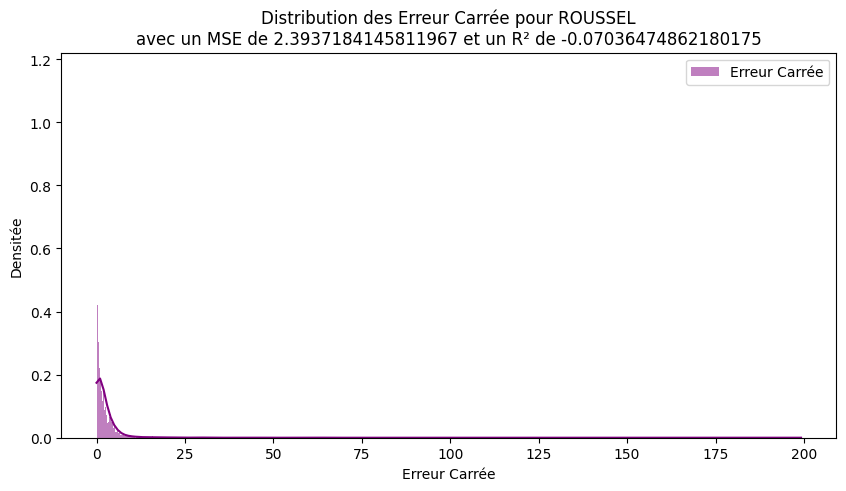

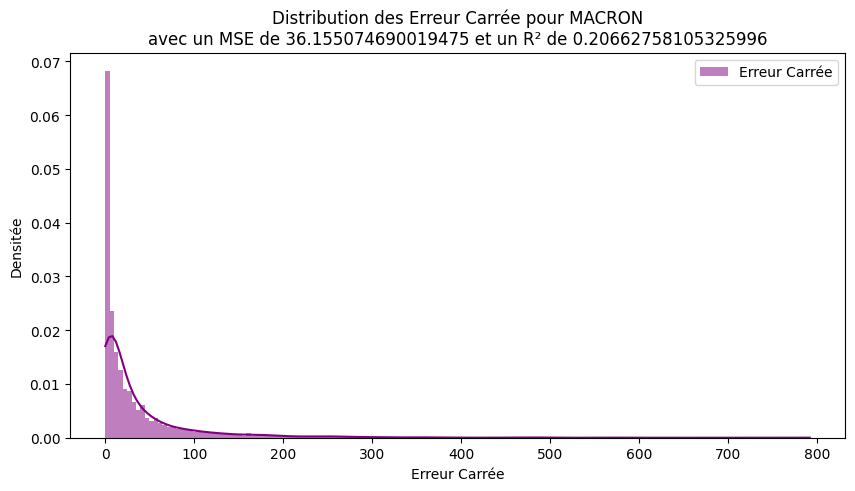

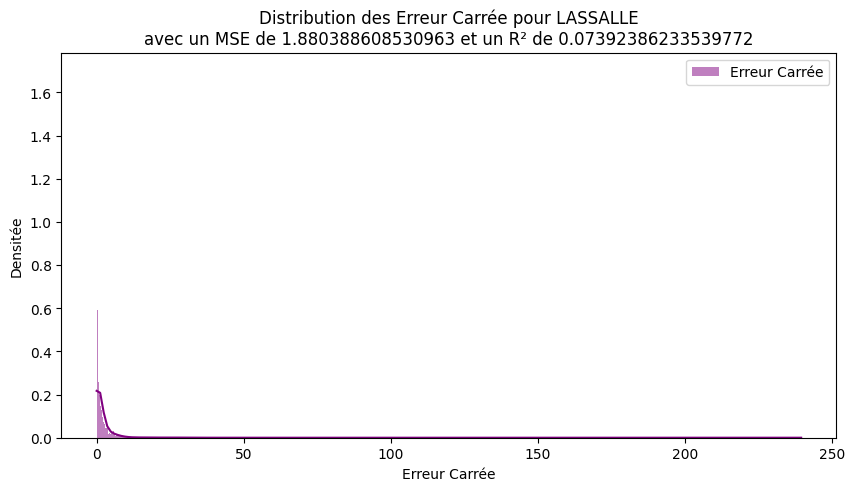

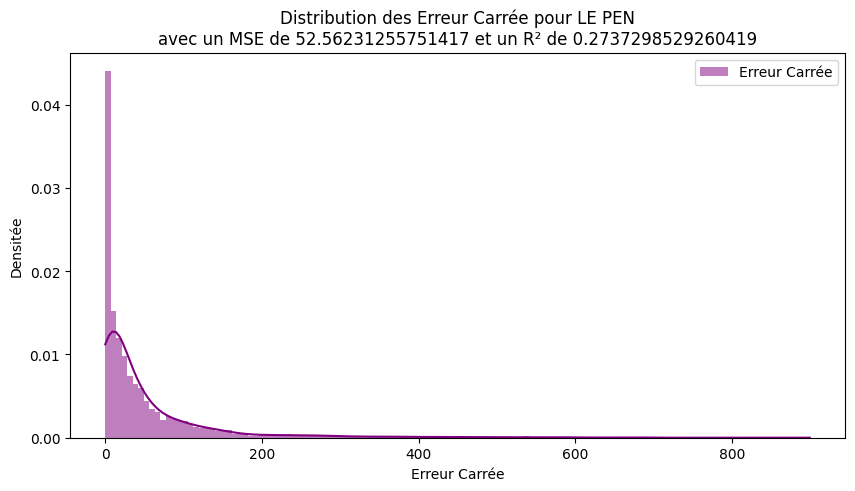

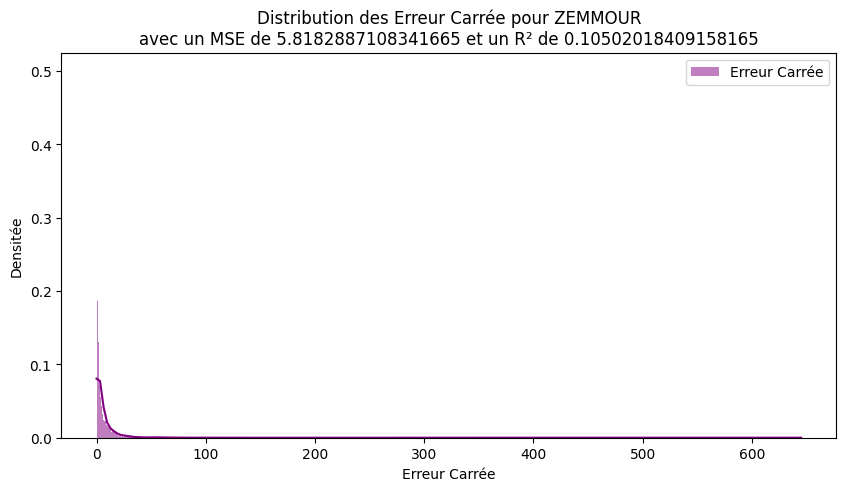

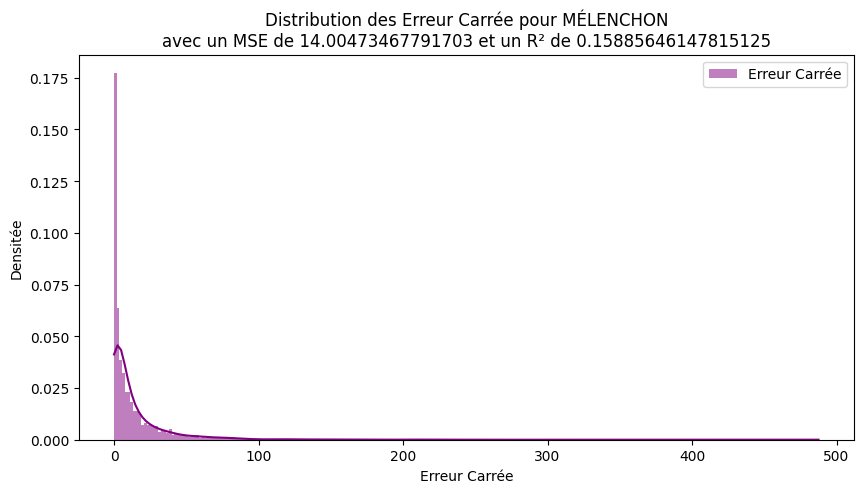

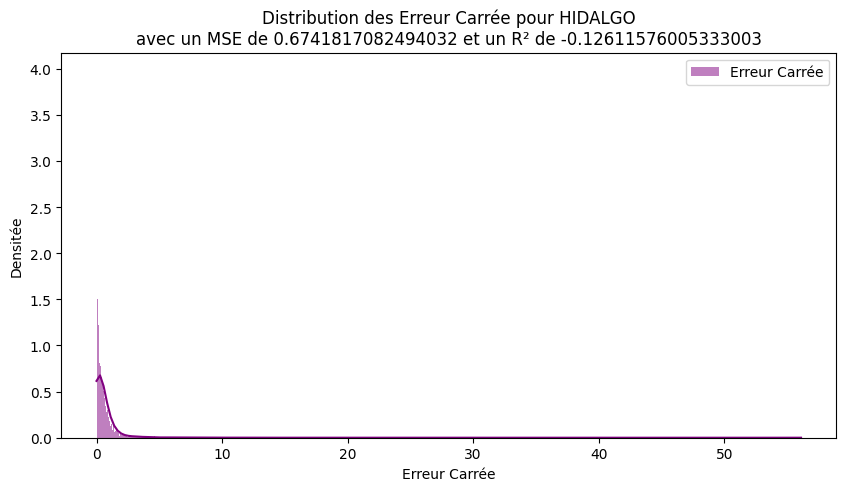

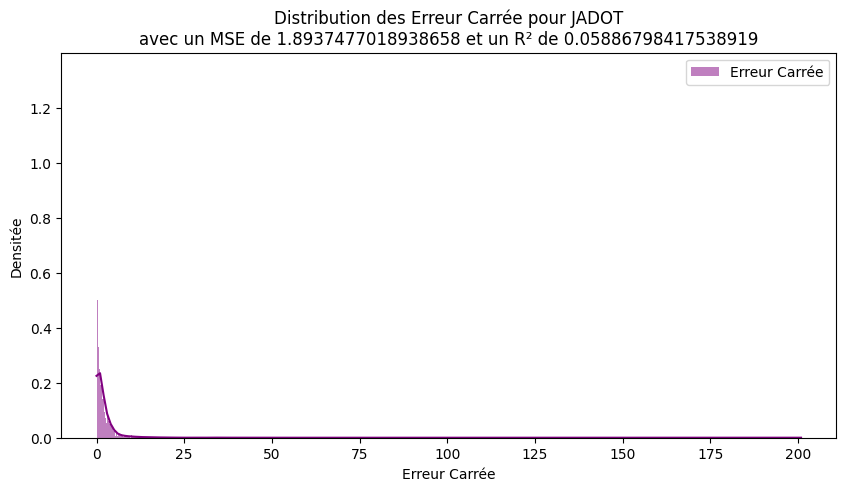

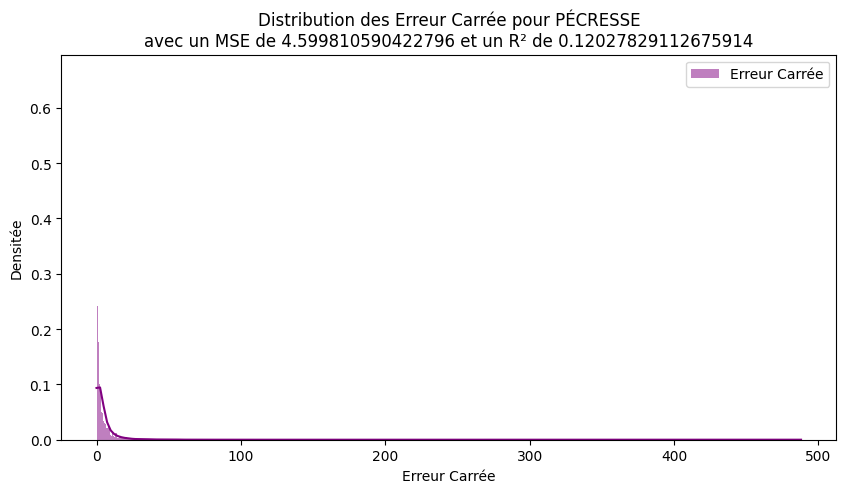

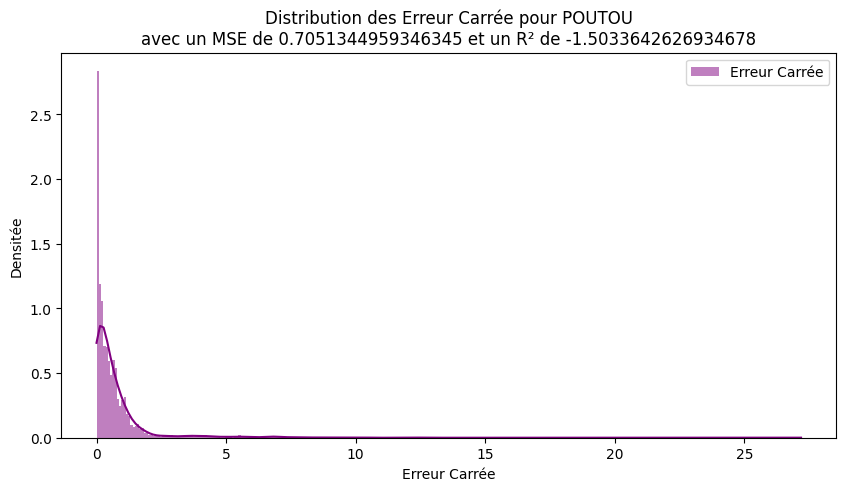

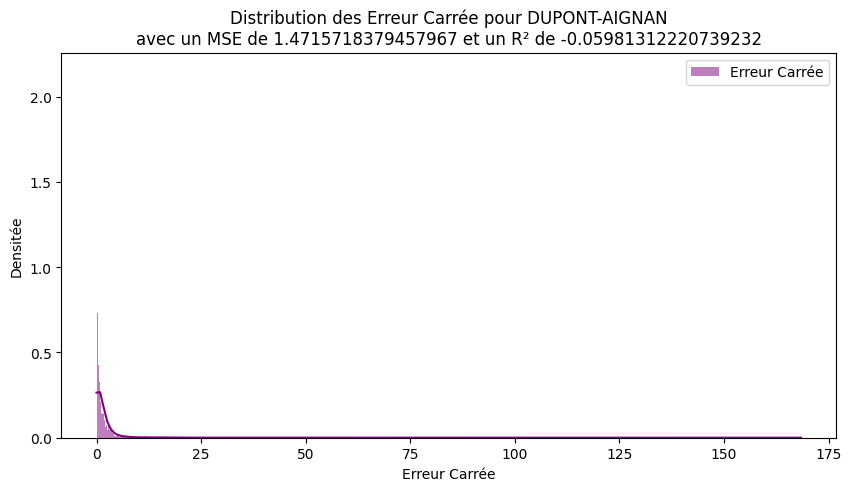

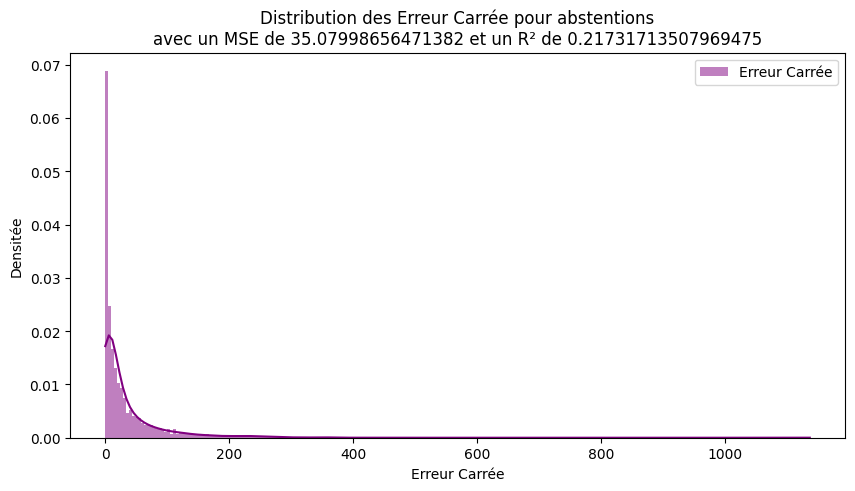

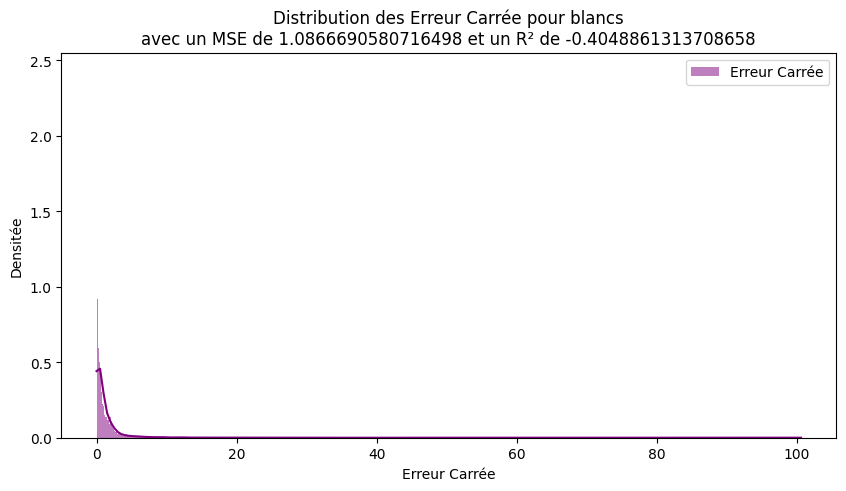

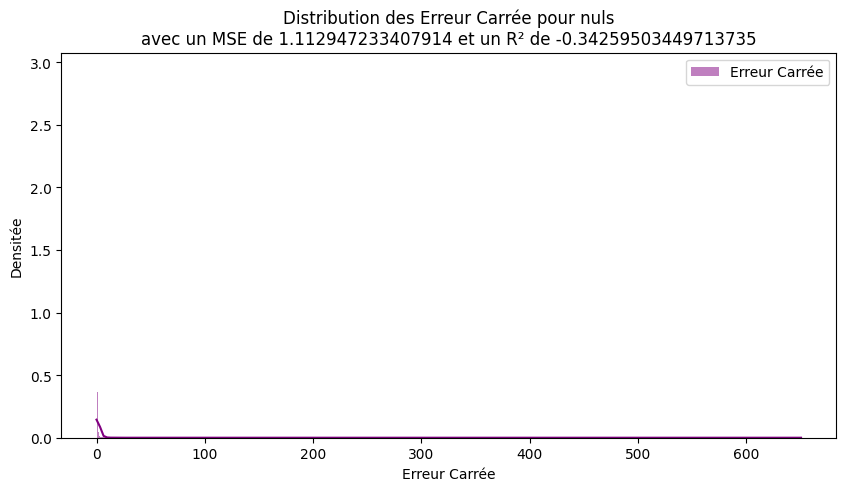

In [15]:
from sklearn.metrics import r2_score

for nom_value in unique_noms:
    subset = df_results[df_results['nom'] == nom_value]
    mean_squared_error = subset['Squared_Error'].mean()
    r2 = r2_score(subset['Actual'], subset['Predicted'])
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['Squared_Error'], color='purple', kde=True, label='Erreur Carrée', stat="density", linewidth=0)
    plt.xlabel('Erreur Carrée')
    plt.ylabel('Densitée')
    plt.title(f'Distribution des Erreur Carrée pour {nom_value}\navec un MSE de {mean_squared_error} et un R² de {r2}')
    plt.legend()
    plt.show()

In [16]:
df_results['Error'] = abs(df_results['Actual'] - df_results['Predicted'])
print(df_results['Predicted'])

0         0.637016
1         2.353050
2        16.799630
3         1.948726
4        29.806632
           ...    
56950     0.695431
56951     1.891983
56952    19.224153
56953     1.259338
56954     0.917858
Name: Predicted, Length: 56955, dtype: float64


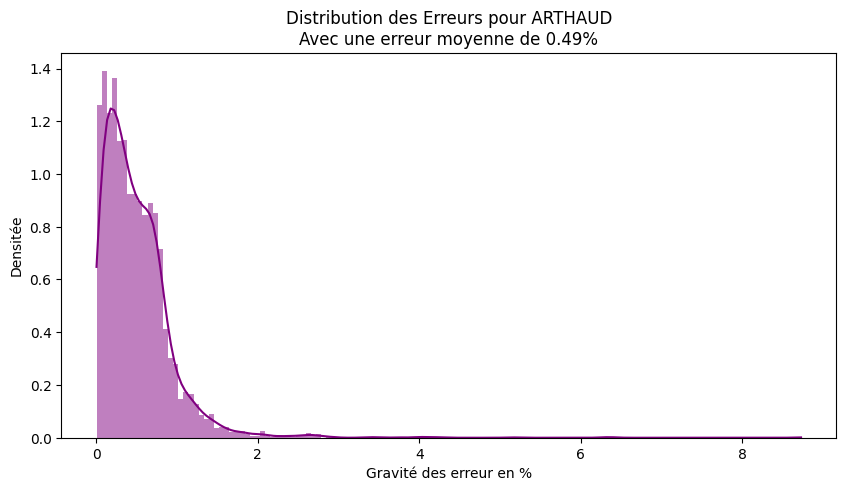

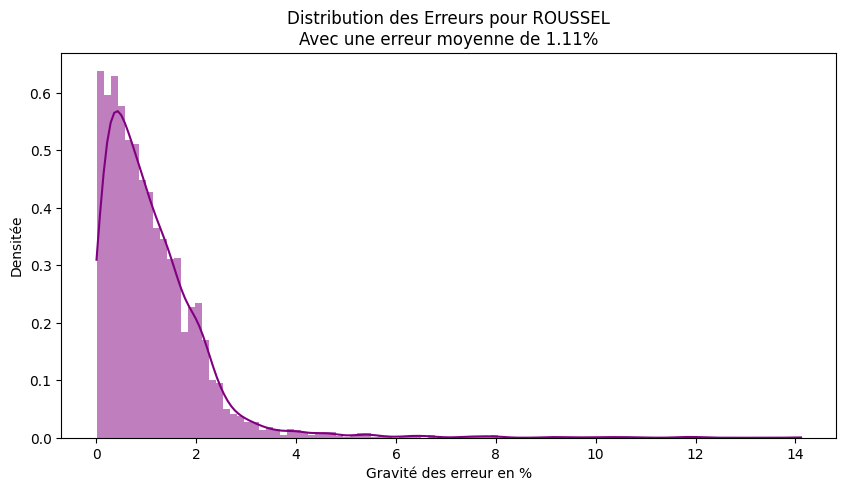

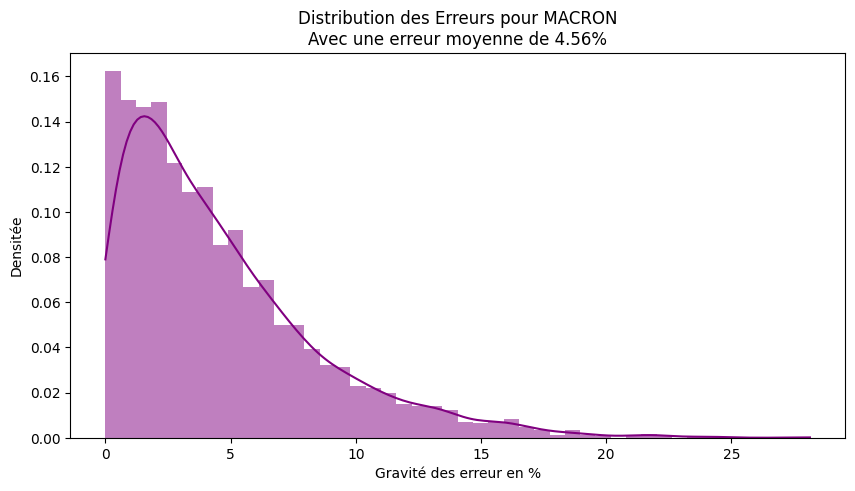

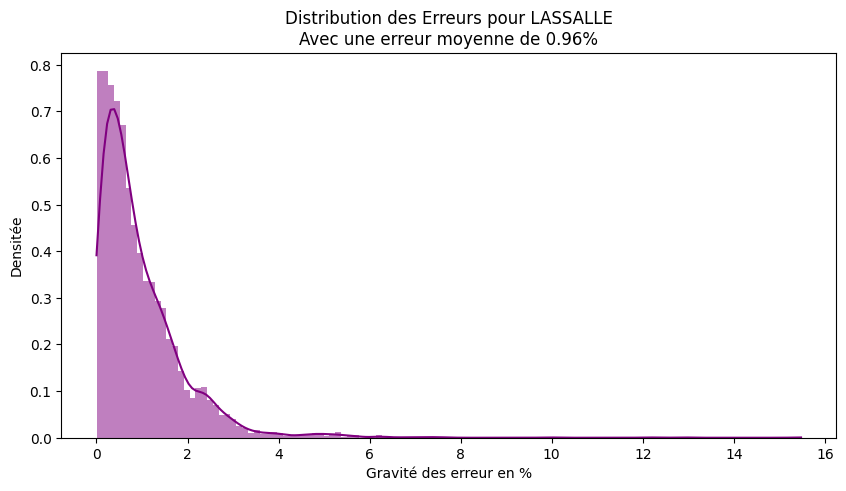

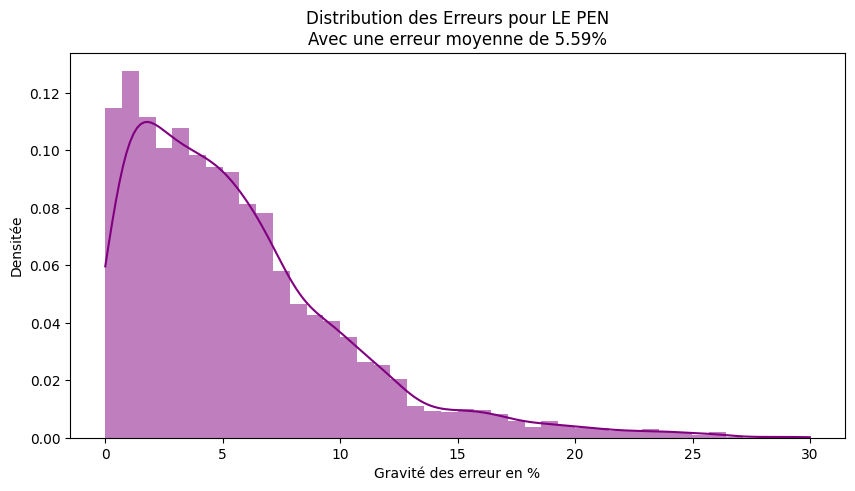

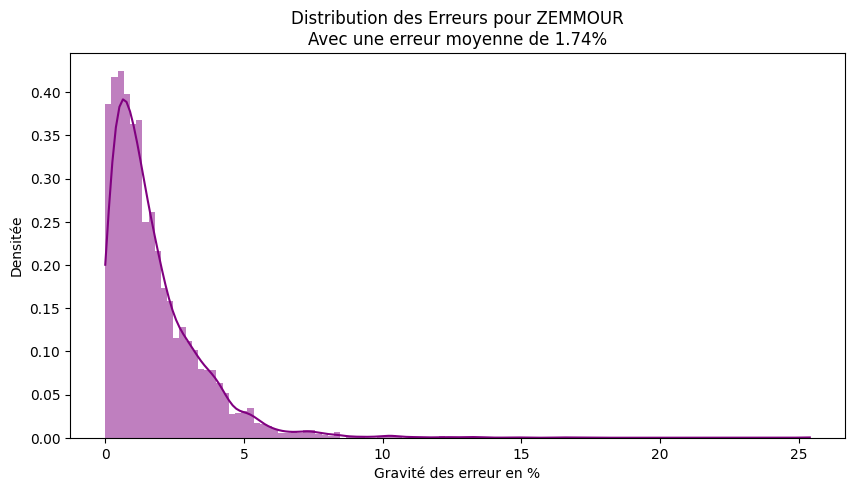

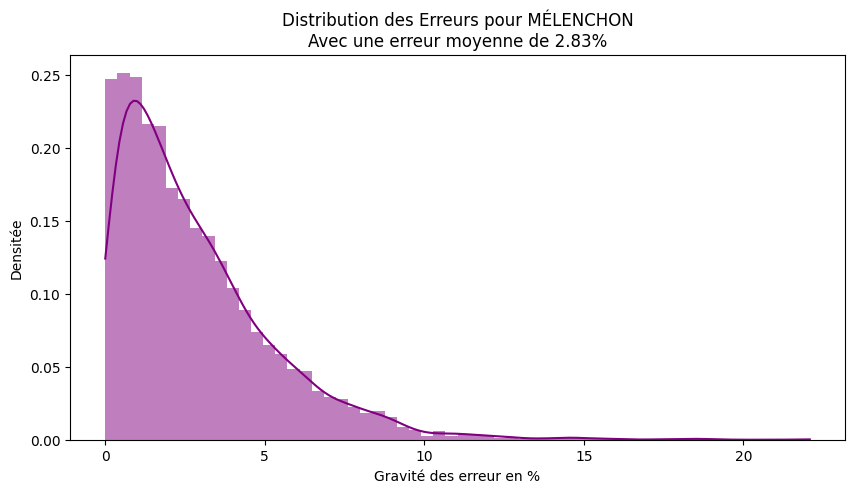

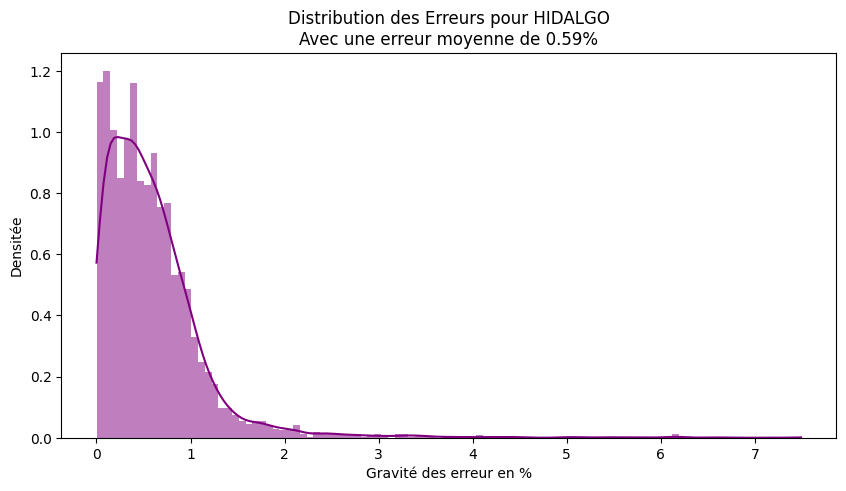

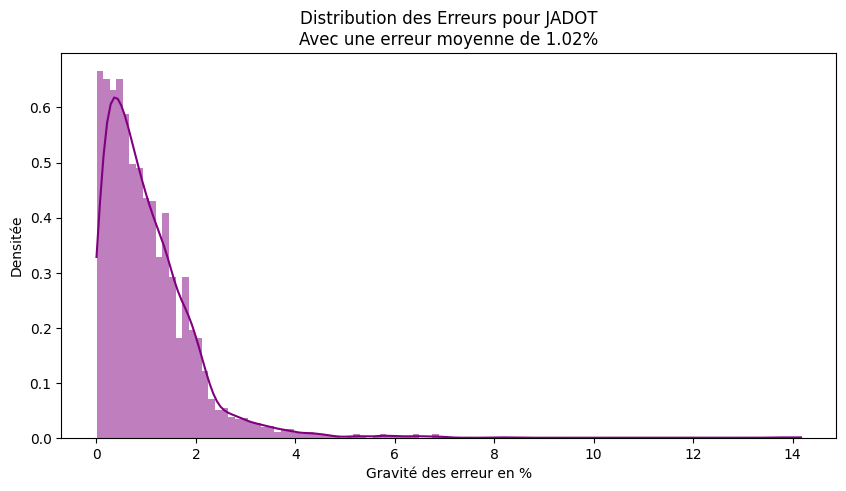

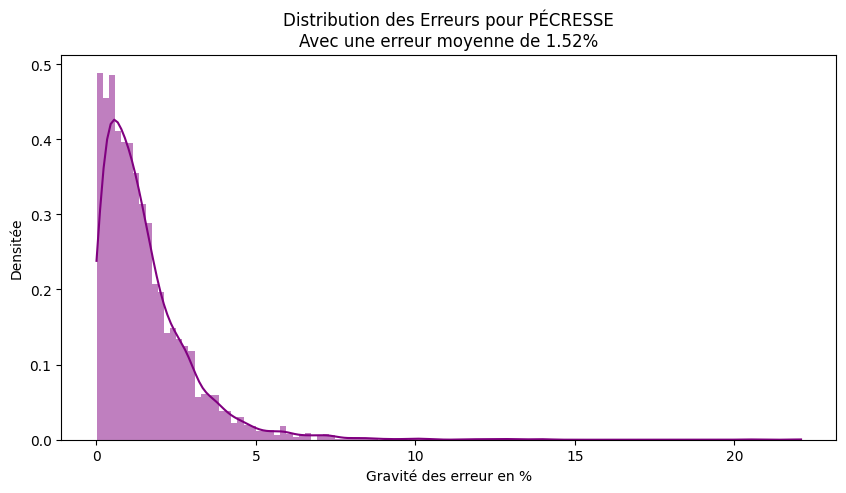

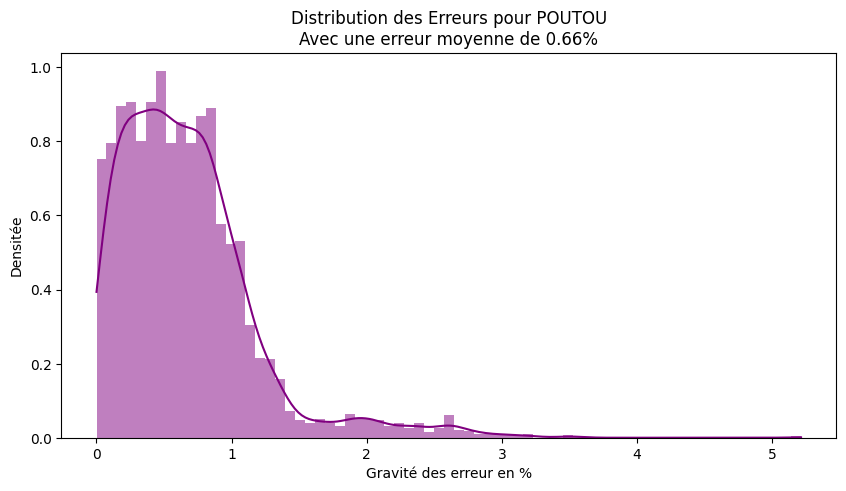

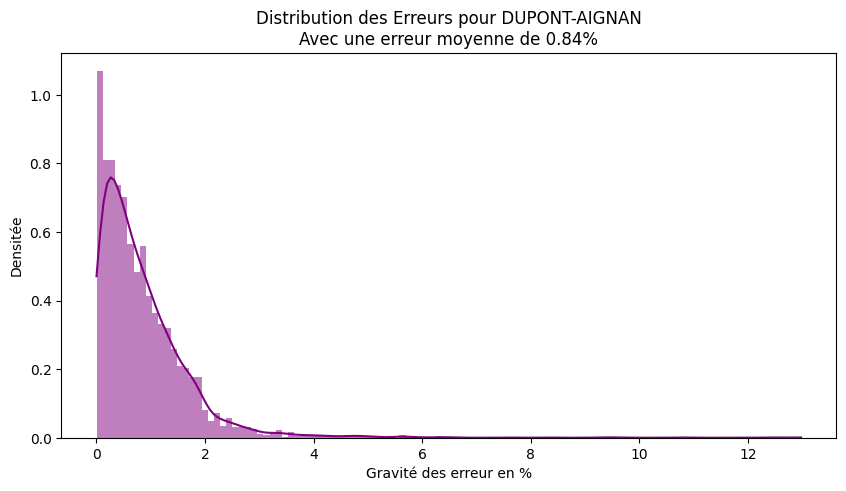

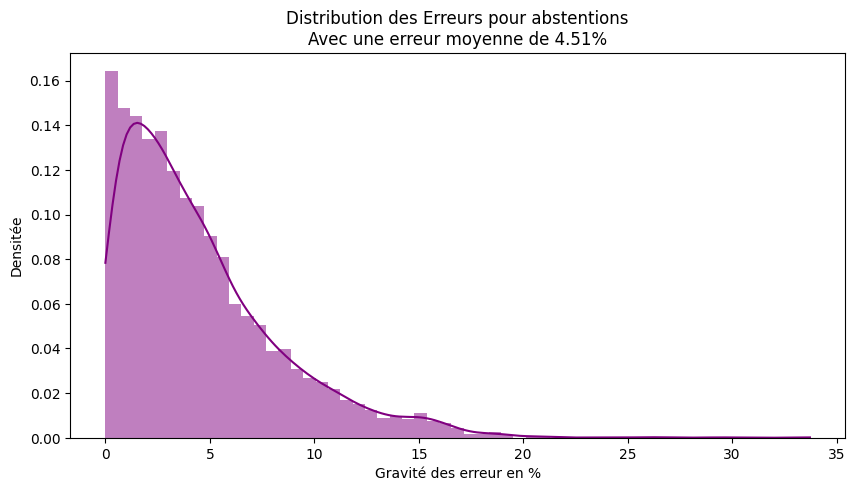

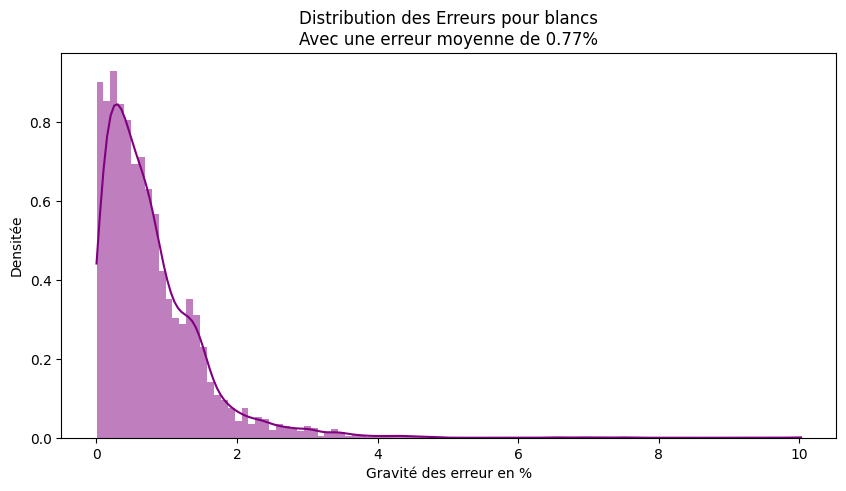

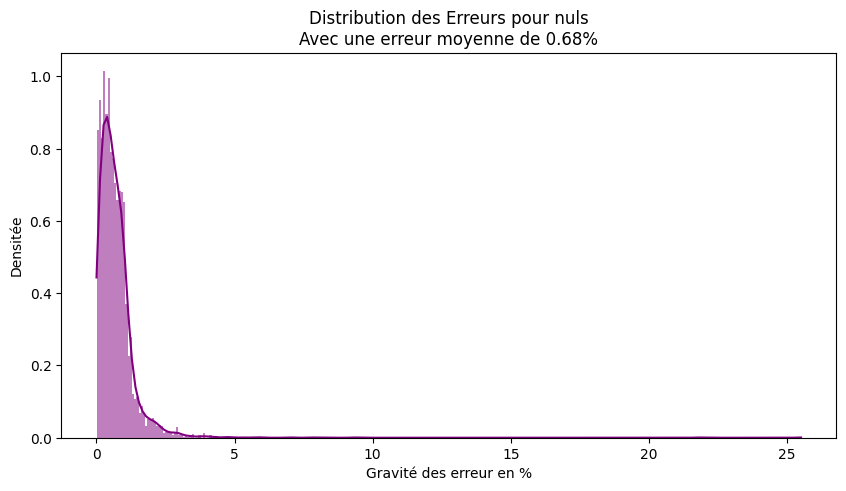

In [17]:
for nom_value in unique_noms:
    subset = df_results[df_results['nom'] == nom_value]
    mean_error = round(subset['Error'].mean(),2)
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['Error'], color='purple', kde=True, label="% d'Erreur", stat="density", linewidth=0)
    plt.xlabel('Gravité des erreur en %')
    plt.ylabel('Densitée')
    plt.title(f'Distribution des Erreurs pour {nom_value}\nAvec une erreur moyenne de {mean_error}%')
    plt.show()

In [18]:
mean_error = round(df_results['Error'].mean(),2)
print(f"Mean Error of {mean_error}%")
print(f"Accuracy of {100-mean_error}%")

Mean Error of 1.86%
Accuracy of 98.14%


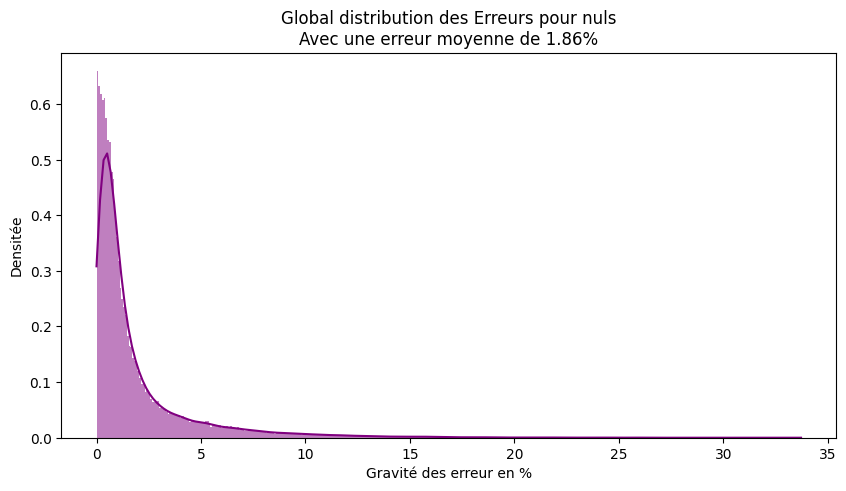

In [19]:
plt.figure(figsize=(10, 5))
mean_error = round(df_results['Error'].mean(),2)
sns.histplot(df_results['Error'], color='purple', kde=True, label="% d'Erreur", stat="density", linewidth=0)
plt.xlabel('Gravité des erreur en %')
plt.ylabel('Densitée')
plt.title(f'Global distribution des Erreurs pour {nom_value}\nAvec une erreur moyenne de {mean_error}%')
plt.show()